In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# read the file
data = pd.read_csv('D:\INTI Degree\DEG YEAR 3 INTI-Sem 8\Machine Learning\SeoulBikeData.csv', encoding='ISO-8859-1')


In [3]:
# read the top 5 rows
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  1/12/2017                254     0             -5.2           37   
1  1/12/2017                204     1             -5.5           38   
2  1/12/2017                173     2             -6.0           39   
3  1/12/2017                107     3             -6.2           40   
4  1/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [4]:
# checks for number of rows and columns
data.shape

(8760, 14)

In [5]:
data.size

122640

In [6]:
# check the number of null values
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [7]:
# check the information of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
# data types
data.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [9]:
# get numeric column's maths calculations
data.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [10]:
# unique values
data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [11]:
# duplicate check
data_duplicate= data.copy()
data_duplicate.drop_duplicates(subset= None, inplace= True)
data_duplicate.shape

(8760, 14)

In [12]:
# create a new dataframe to identify unknow junk values 
data_dummy= data.iloc[:, 0:15]

In [13]:
for col in data_dummy:
    print(data_dummy[col].value_counts(ascending= False), '\n')

1/12/2017     24
9/8/2018      24
7/8/2018      24
6/8/2018      24
5/8/2018      24
              ..
31/3/2018     24
30/3/2018     24
29/3/2018     24
28/3/2018     24
30/11/2018    24
Name: Date, Length: 365, dtype: int64 

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64 

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64 

 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: Temperature(°C), Length: 546, dtype: int64 

53    173
97    173
43    164
57    159
56    157
     ... 
19     11
13      3
10      1
12      1
11      1
Name: Humidity(%), Length: 

In [14]:
# plot bike counts over hours
plt.figure(figsize=(18, 6))

sns.lineplot(data=data, x='Hour', y='Rented Bike Count')

plt.title('Rented Bike Count Over Hours')

plt.show()

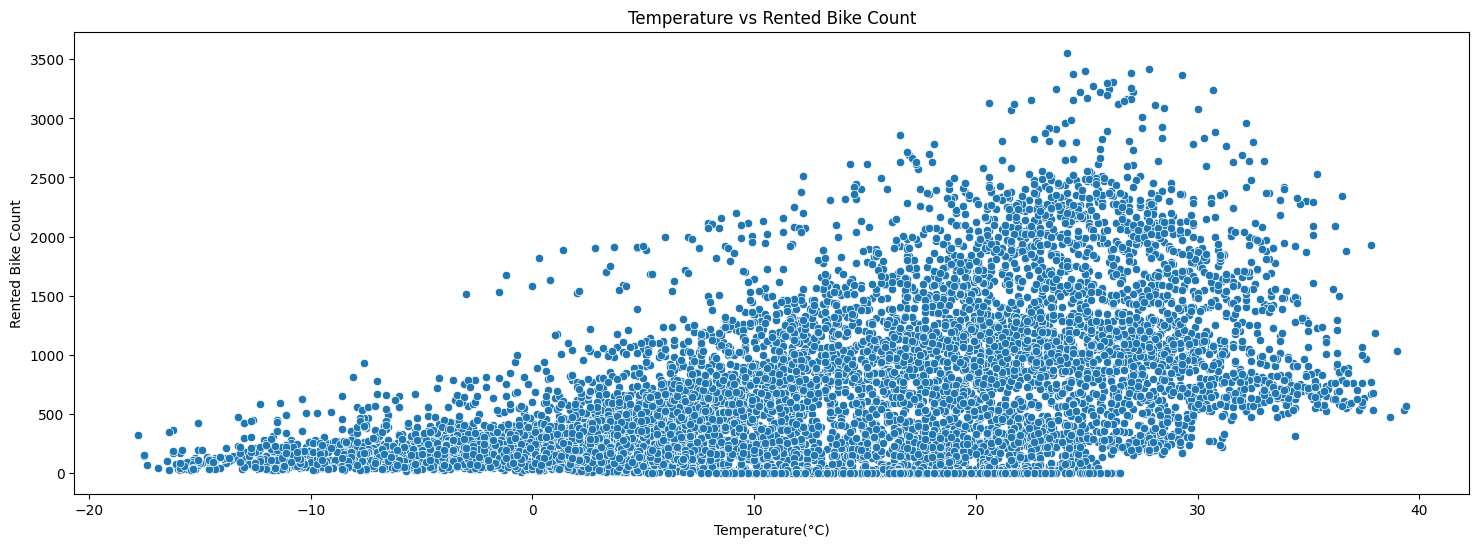

In [15]:
# plot bike counts over temperature
plt.figure(figsize=(18, 6))

sns.scatterplot(data=data, x='Temperature(°C)', y='Rented Bike Count')

plt.title('Temperature vs Rented Bike Count')

plt.show()

In [16]:
# plot bike counts over humidity
plt.figure(figsize=(18, 6))

sns.lineplot(data=data, x='Humidity(%)', y='Rented Bike Count')

plt.title('Humidity vs Rented Bike Count')

plt.show()

In [17]:
# plot bike counts over wind speed
plt.figure(figsize=(18, 6))

sns.scatterplot(data=data, x='Wind speed (m/s)', y='Rented Bike Count')

plt.title('Wind Speed vs Rented Bike Count')

plt.show()

In [18]:
# plot bike counts over visibility (haze/fog)
plt.figure(figsize=(18, 6))

sns.scatterplot(data=data, x='Visibility (10m)', y='Rented Bike Count')

plt.title('Visibility vs Rented Bike Count')

plt.show()

In [19]:
# plot bike counts over dew point temperature
plt.figure(figsize=(18, 6))

sns.scatterplot(data=data, x='Dew point temperature(°C)', y='Rented Bike Count')

plt.title('Dew point temperature vs Rented Bike Count')

plt.show()

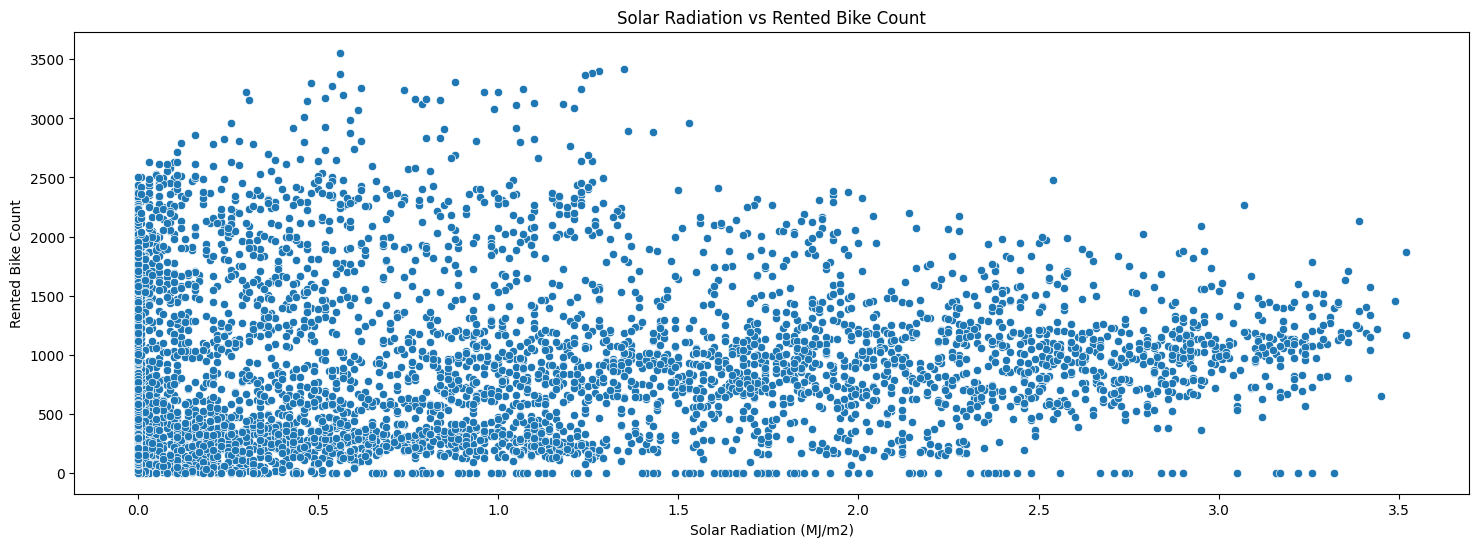

In [20]:
# plot bike counts over solar radiation
plt.figure(figsize=(18, 6))

sns.scatterplot(data=data, x='Solar Radiation (MJ/m2)', y='Rented Bike Count')

plt.title('Solar Radiation vs Rented Bike Count')

plt.show()

In [21]:
# plot bike counts over rainfall
plt.figure(figsize=(18, 6))

sns.scatterplot(data=data, x='Rainfall(mm)', y='Rented Bike Count')

plt.title('Rainfall vs Rented Bike Count')

plt.show()

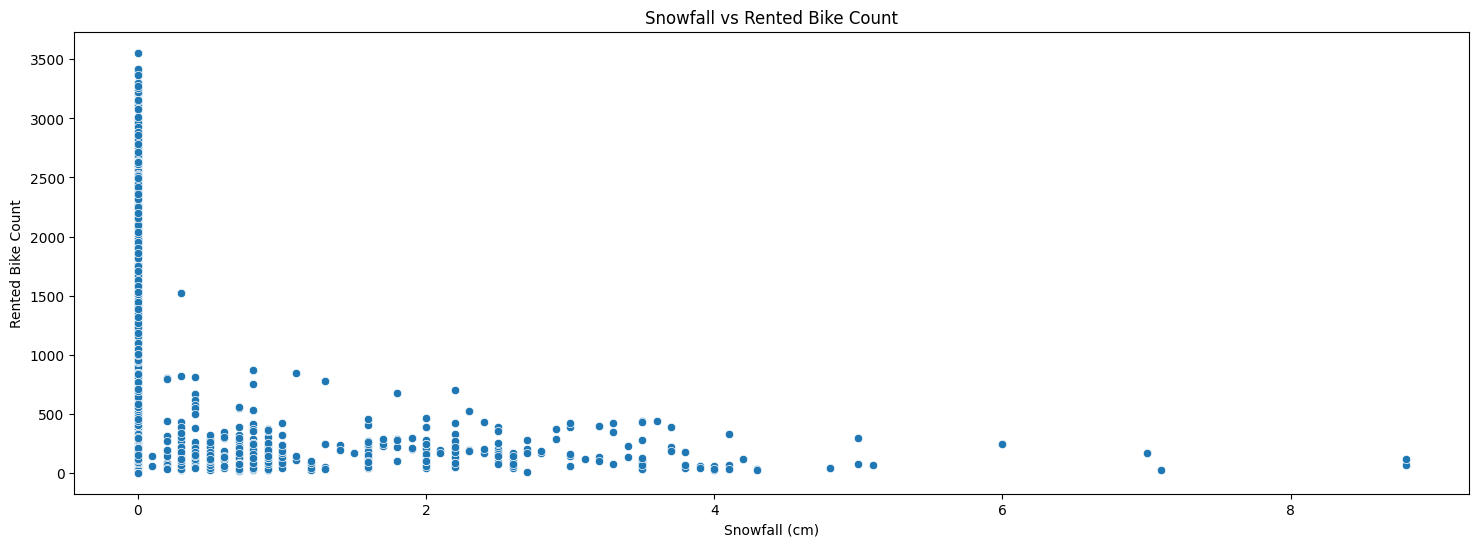

In [22]:
# plot bike counts over snowfall
plt.figure(figsize=(18, 6))

sns.scatterplot(data=data, x='Snowfall (cm)', y='Rented Bike Count')

plt.title('Snowfall vs Rented Bike Count')

plt.show()

In [23]:
# plot bike counts over seasons
plt.figure(figsize=(8, 6))

sns.countplot(x='Seasons', data=data, palette='coolwarm')

plt.title('Distribution of Seasons')

plt.xlabel('Seasons')

plt.ylabel('Count')

plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Autumn', 'Winter'])

plt.show()

In [24]:
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

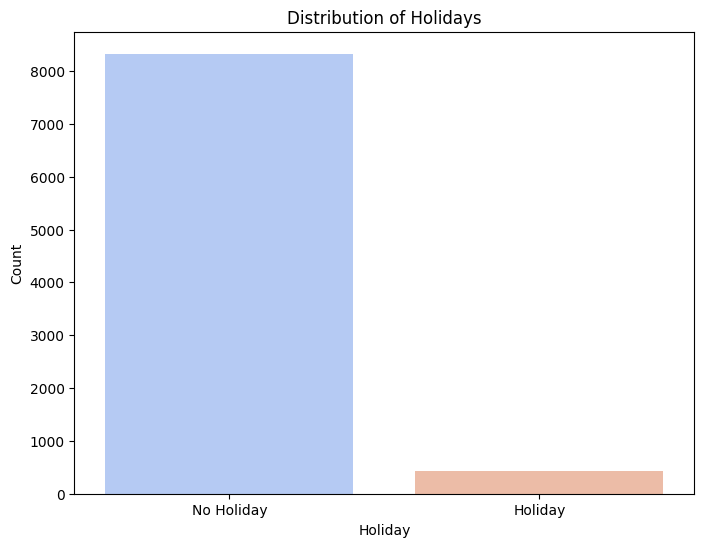

In [25]:
# plot bike counts over holiday
plt.figure(figsize=(8, 6))

sns.countplot(x='Holiday', data=data, palette='coolwarm')

plt.title('Distribution of Holidays')

plt.xlabel('Holiday')

plt.ylabel('Count')

plt.xticks([0, 1], ['No Holiday', 'Holiday'])

plt.show()

In [26]:
data.hist(figsize=(10, 15))

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature(°C)'}>],
       [<Axes: title={'center': 'Humidity(%)'}>,
        <Axes: title={'center': 'Wind speed (m/s)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>],
       [<Axes: title={'center': 'Dew point temperature(°C)'}>,
        <Axes: title={'center': 'Solar Radiation (MJ/m2)'}>,
        <Axes: title={'center': 'Rainfall(mm)'}>],
       [<Axes: title={'center': 'Snowfall (cm)'}>, <Axes: >, <Axes: >]],
      dtype=object)

In [27]:
# check for missing values in the 'Seasons' column
print(data['Seasons'].isnull().sum())

print(data['Seasons'].unique())


0
['Winter' 'Spring' 'Summer' 'Autumn']


In [28]:
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [29]:
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [30]:
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

C:\Users\Hui Zhen\AppData\Local\Temp\ipykernel_11860\1172245392.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


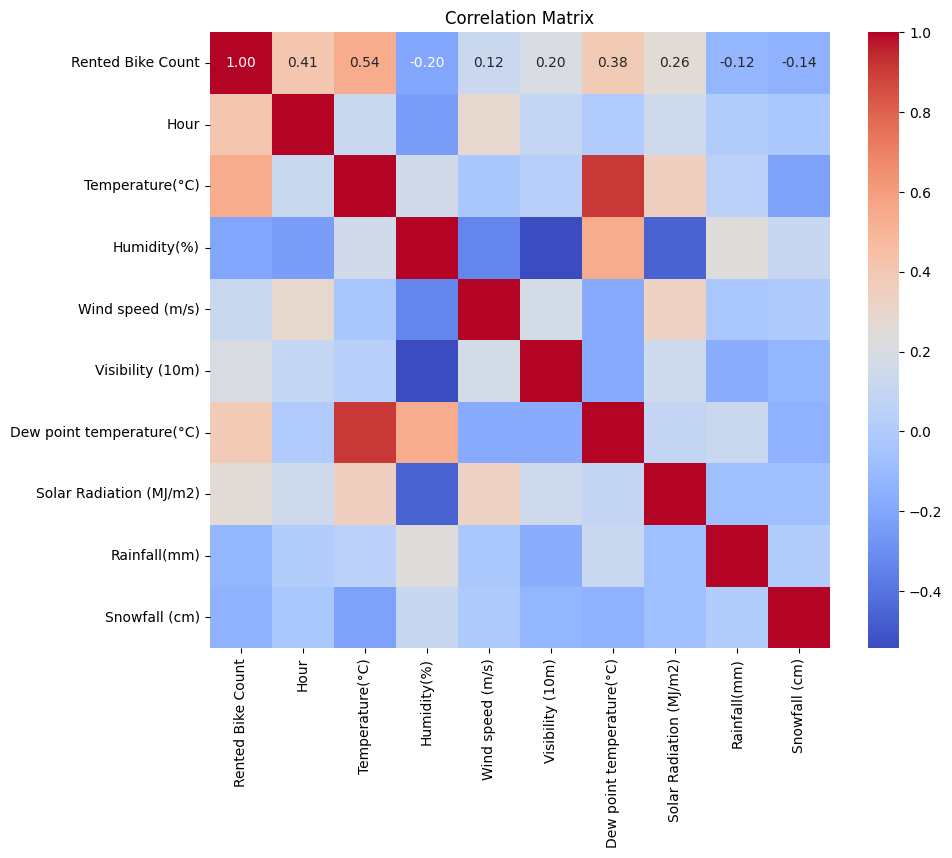

In [31]:
# check the correlation matrix
correlation_matrix = data.corr()

# plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [32]:
#data['Heat Index'] = (data['Temperature(°C)'] + data['Dew point temperature(°C)']) / 2


In [33]:
#data['Sun Exposure Index'] = (data['Temperature(°C)'] * data['Solar Radiation (MJ/m2)']) 

#data['Moisture Index'] = (data['Humidity(%)'] + data['Dew point temperature(°C)']) / 2


In [34]:
data= data.drop(columns=['Dew point temperature(°C)'])


In [35]:
correlation_matrix = data.corr()

# plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

C:\Users\Hui Zhen\AppData\Local\Temp\ipykernel_11860\2553273108.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [36]:
data.shape

(8760, 13)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     8760 non-null   object 
 1   Rented Bike Count        8760 non-null   int64  
 2   Hour                     8760 non-null   int64  
 3   Temperature(°C)          8760 non-null   float64
 4   Humidity(%)              8760 non-null   int64  
 5   Wind speed (m/s)         8760 non-null   float64
 6   Visibility (10m)         8760 non-null   int64  
 7   Solar Radiation (MJ/m2)  8760 non-null   float64
 8   Rainfall(mm)             8760 non-null   float64
 9   Snowfall (cm)            8760 non-null   float64
 10  Seasons                  8760 non-null   object 
 11  Holiday                  8760 non-null   object 
 12  Functioning Day          8760 non-null   object 
dtypes: float64(5), int64(4), object(4)
memory usage: 889.8+ KB


In [38]:
data = pd.get_dummies(data, columns=['Seasons'], drop_first=False)


In [39]:
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  1/12/2017                254     0             -5.2           37   
1  1/12/2017                204     1             -5.5           38   
2  1/12/2017                173     2             -6.0           39   
3  1/12/2017                107     3             -6.2           40   
4  1/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0               2.2              2000                      0.0           0.0   
1               0.8              2000                      0.0           0.0   
2               1.0              2000                      0.0           0.0   
3               0.9              2000                      0.0           0.0   
4               2.3              2000                      0.0           0.0   

   Snowfall (cm)     Holiday Functioning Day  Seasons_Autumn  Seasons_Spring  \
0            0.0  No Holiday             Yes               0               0   
1            0.0  No Holiday             Yes               0               0   
2            0.0  No Holiday             Yes               0               0   
3            0.0  No Holiday             Yes               0               0   
4            0.0  No Holiday             Yes               0               0   

   Seasons_Summer  Seasons_Winter  
0               0               1  
1               0               1  
2               0               1  
3               0               1  
4               0               1

In [40]:
data['Date'] = data['Date'].astype('datetime64[ns]')

data['Month'] = data['Date'].dt.month

data['Day'] = data['Date'].dt.day_name()    

C:\Users\Hui Zhen\AppData\Local\Temp\ipykernel_11860\713043732.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = data['Date'].astype('datetime64[ns]')


In [41]:
data['WeekdaysOrWeekend'] = data['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [42]:
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0               2.2              2000                      0.0           0.0   
1               0.8              2000                      0.0           0.0   
2               1.0              2000                      0.0           0.0   
3               0.9              2000                      0.0           0.0   
4               2.3              2000                      0.0           0.0   

   Snowfall (cm)     Holiday Functioning Day  Seasons_Autumn  Seasons_Spring  \
0            0.0  No Holiday             Yes               0               0   
1            0.0  No Holiday             Yes               0               0   
2            0.0  No Holiday             Yes               0               0   
3            0.0  No Holiday             Yes               0               0   
4            0.0  No Holiday             Yes               0               0   

   Seasons_Summer  Seasons_Winter  Month       Day  WeekdaysOrWeekend  
0               0               1      1  Thursday                  0  
1               0               1      1  Thursday                  0  
2               0               1      1  Thursday                  0  
3               0               1      1  Thursday                  0  
4               0               1      1  Thursday                  0

In [43]:
data['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [44]:
data['WeekdaysOrWeekend'].value_counts()

0    6216
1    2544
Name: WeekdaysOrWeekend, dtype: int64

In [45]:
data['Day'].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: Day, dtype: int64

In [46]:
# check for any duplicates
duplicate = data.duplicated().sum()
print(duplicate)

0


In [47]:
numeric_features = data.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons_Autumn', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Month', 'WeekdaysOrWeekend'],
      dtype='object')

In [48]:
categorical_columns = list(set(data.columns) - set(numeric_features))
categorical_columns

['Day', 'Functioning Day', 'Holiday', 'Date']

C:\Users\Hui Zhen\AppData\Local\Temp\ipykernel_11860\2553273108.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


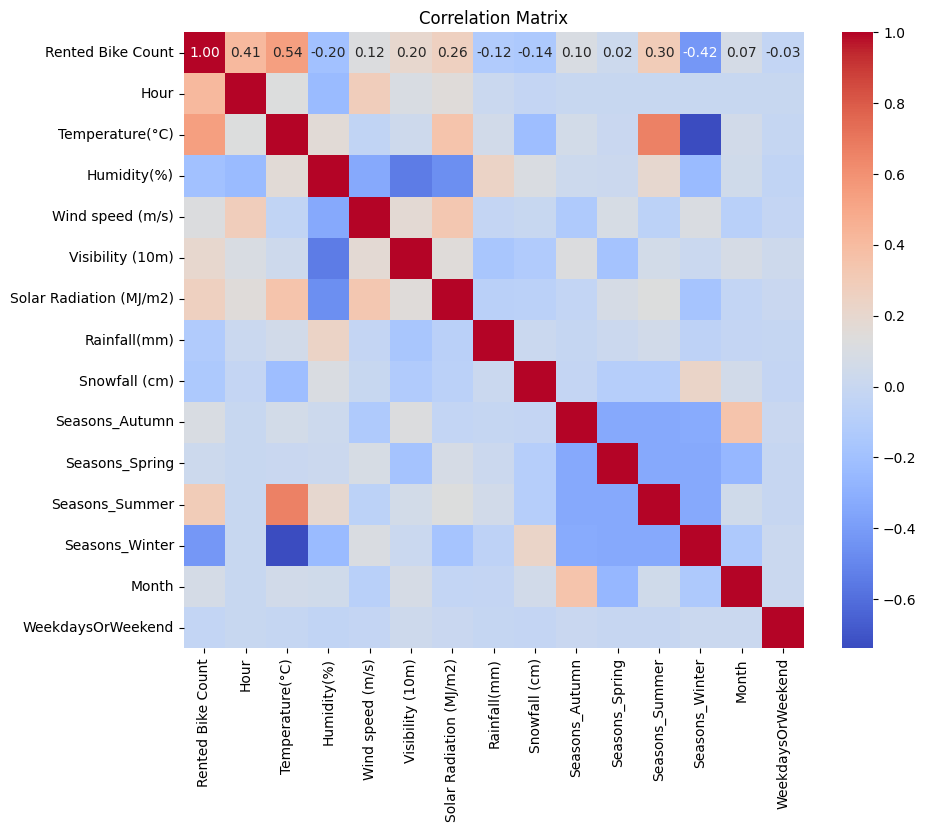

In [49]:
correlation_matrix = data.corr()

# plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [50]:
data.drop(['Date'],axis=1 ,inplace=True)

In [51]:
categorical_columns = list(set(data.columns) - set(numeric_features))
categorical_columns

['Functioning Day', 'Day', 'Holiday']

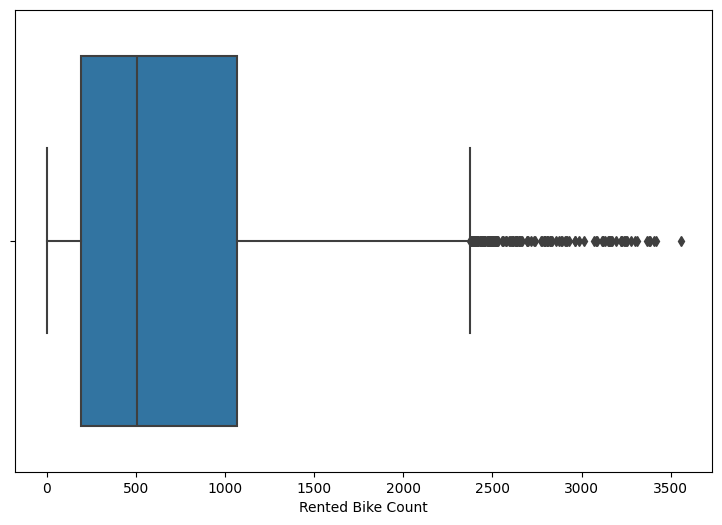

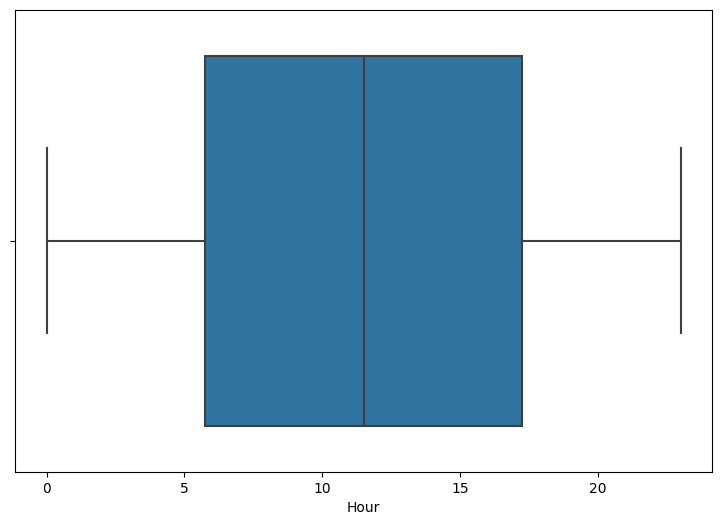

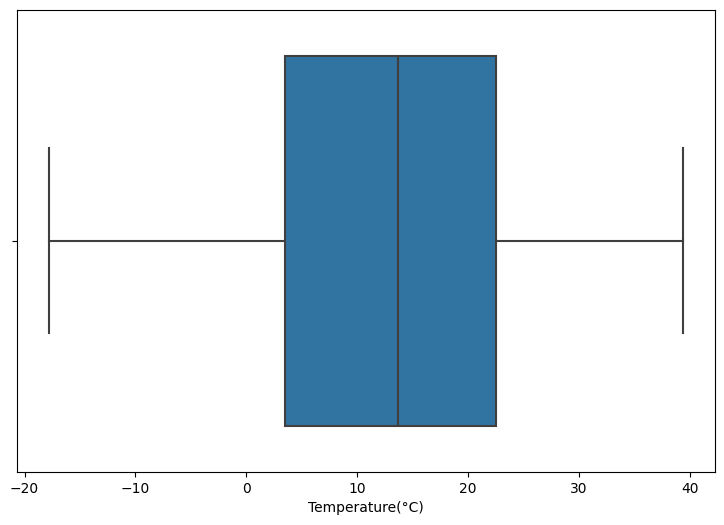

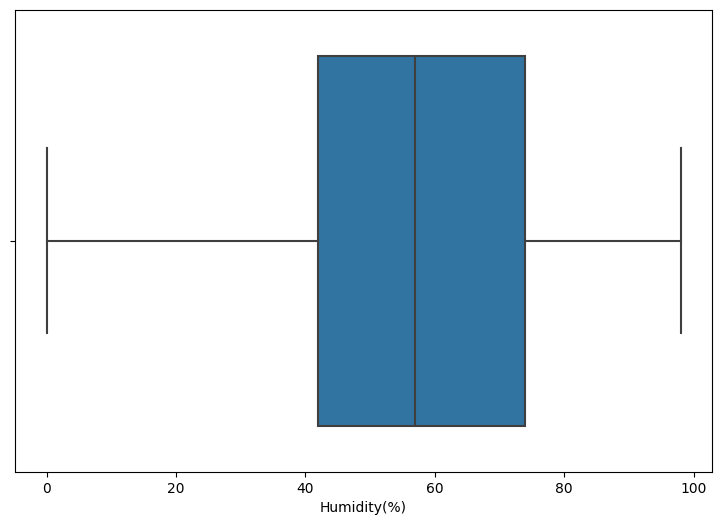

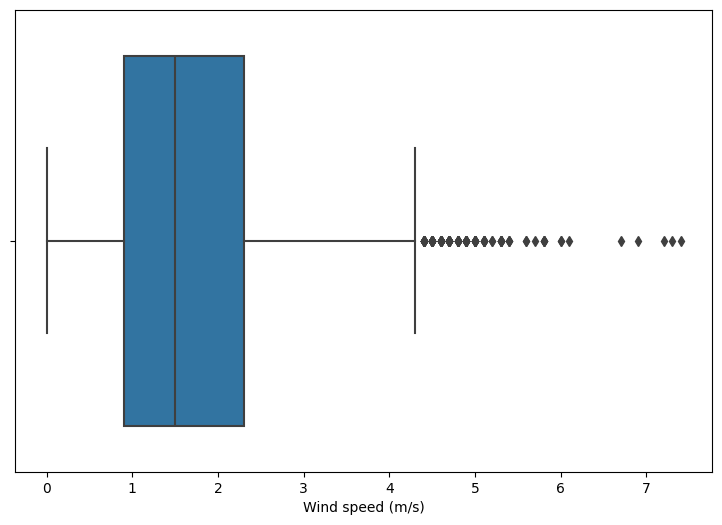

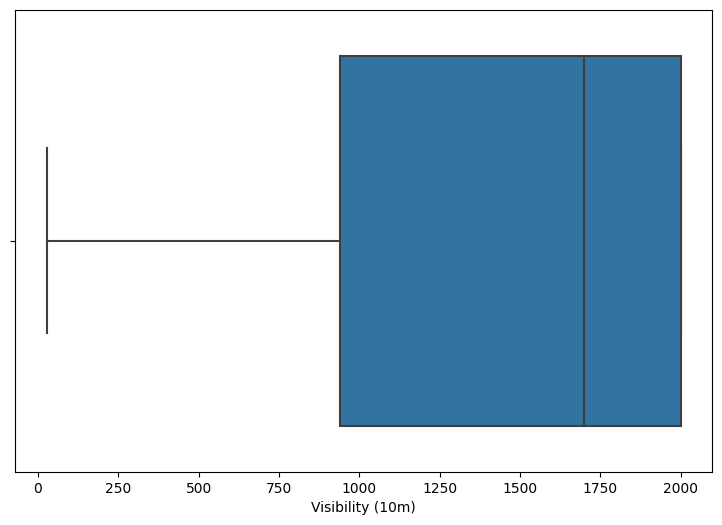

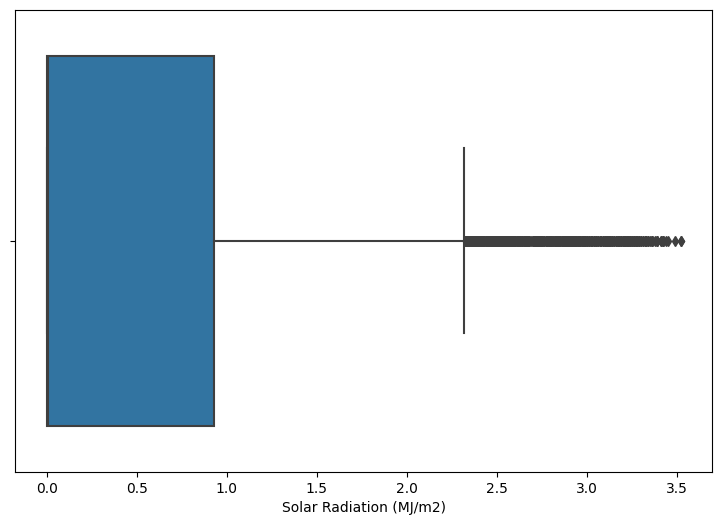

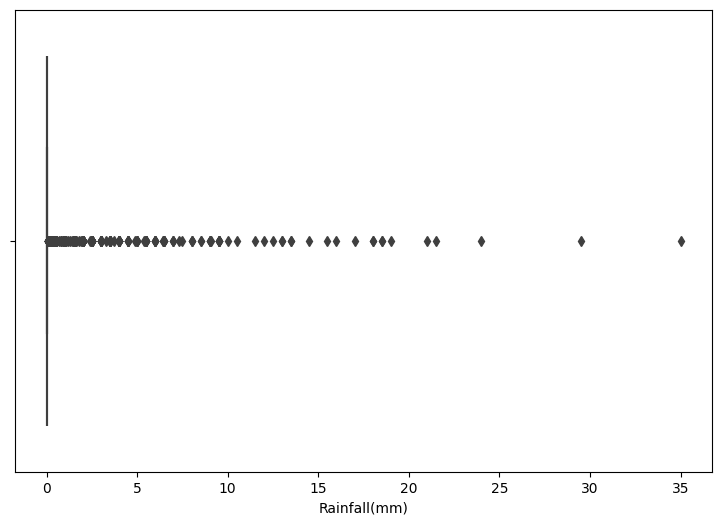

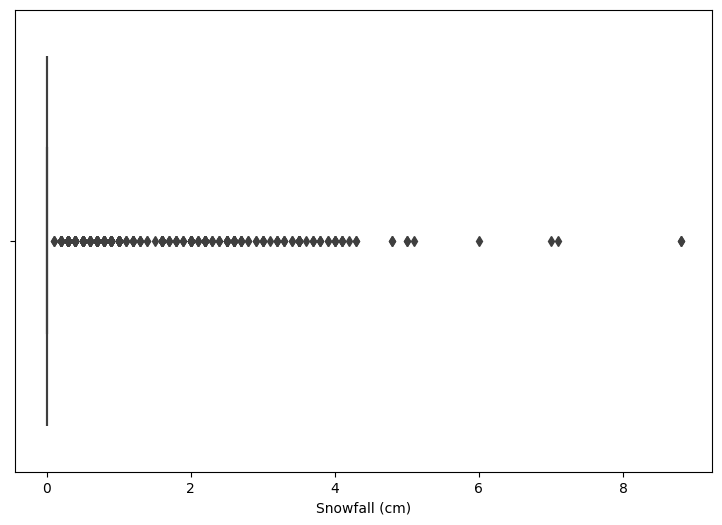

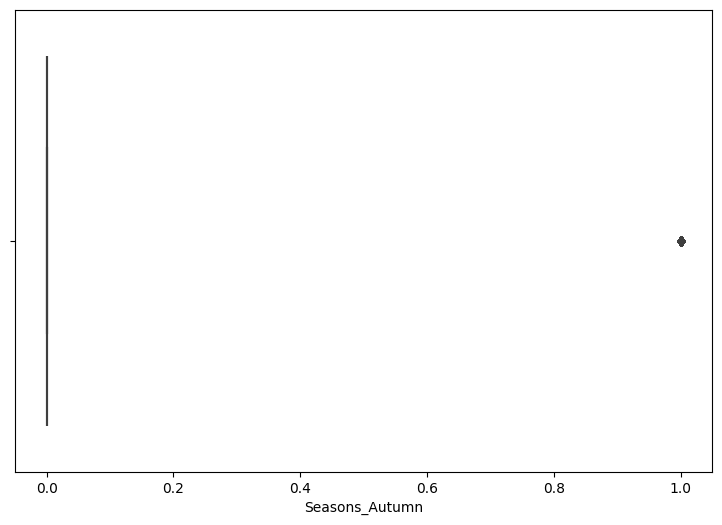

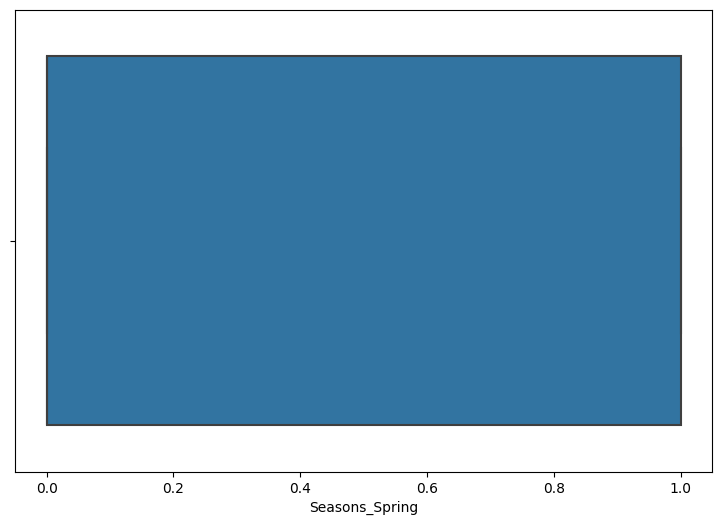

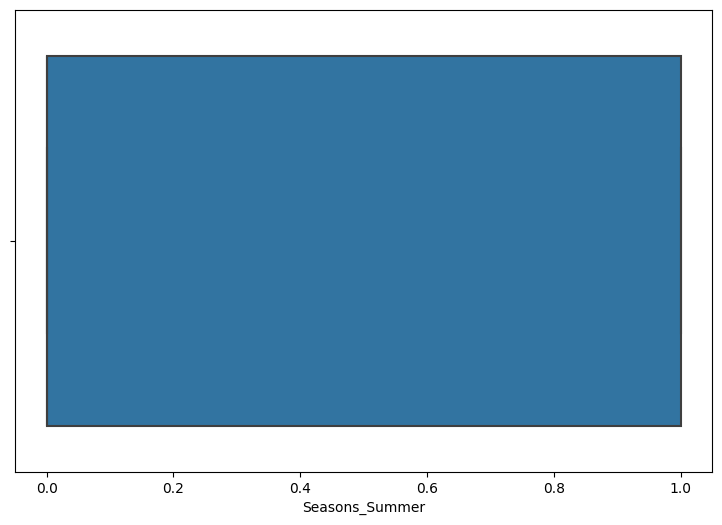

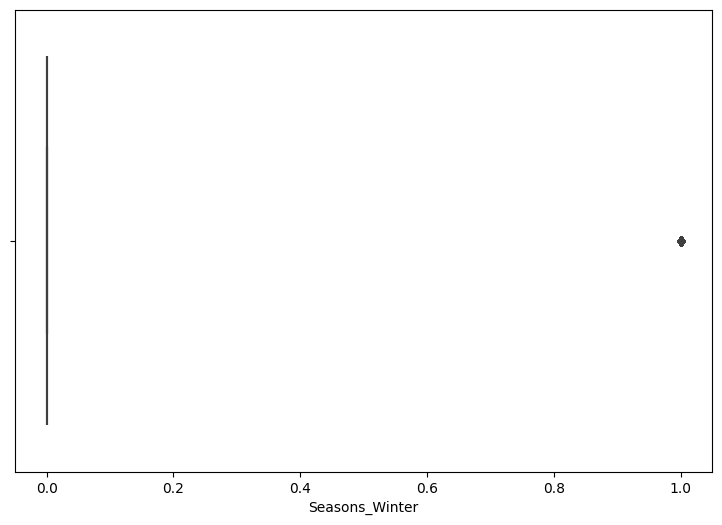

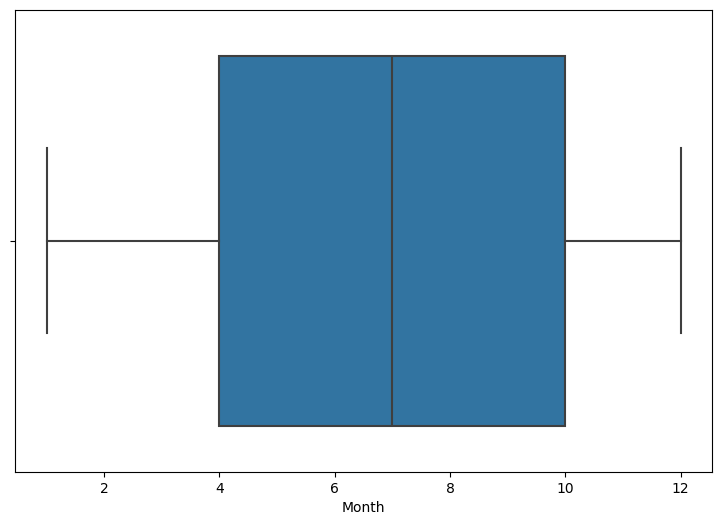

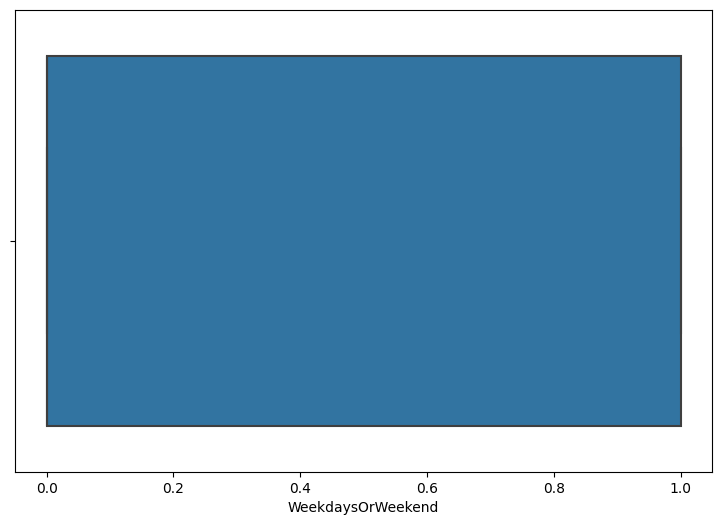

In [52]:
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = data[col])

In [53]:
# check for missing values in categorical columns
print(data[categorical_columns].isnull().sum())

Functioning Day    0
Day                0
Holiday            0
dtype: int64


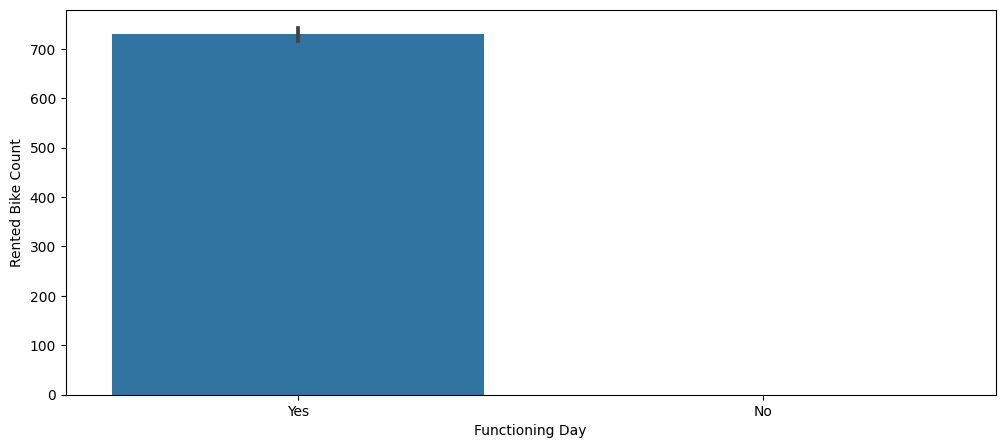

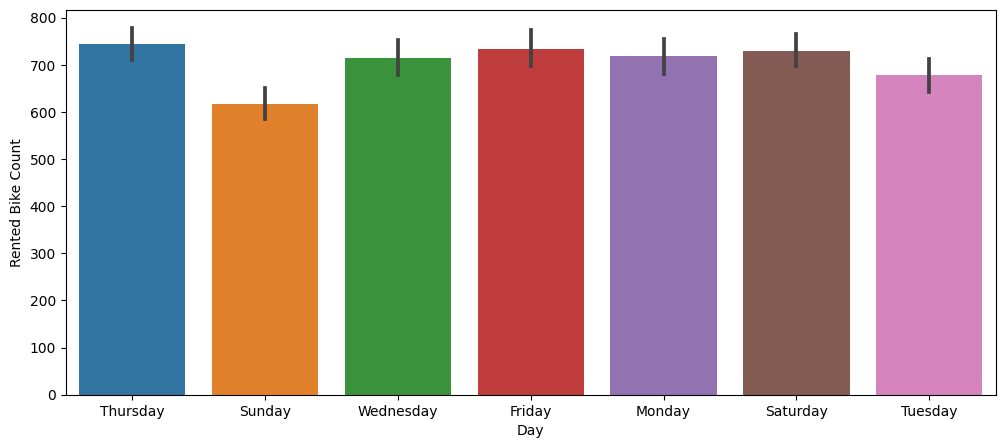

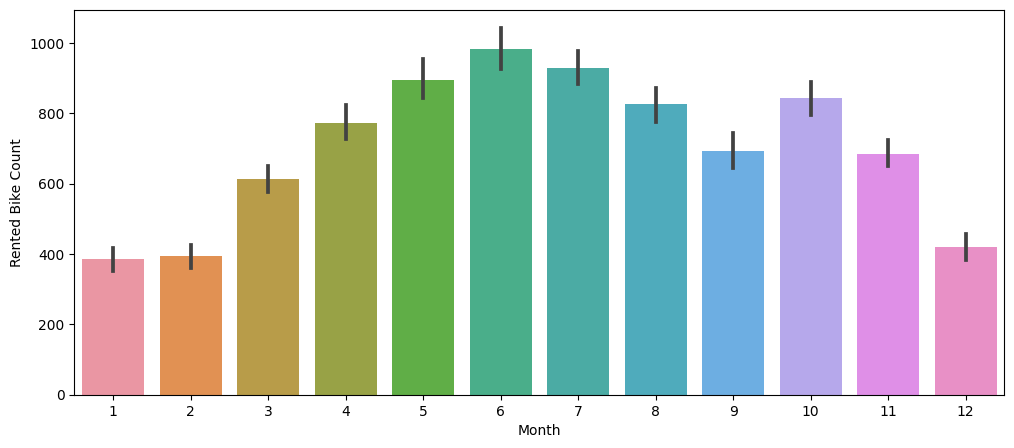

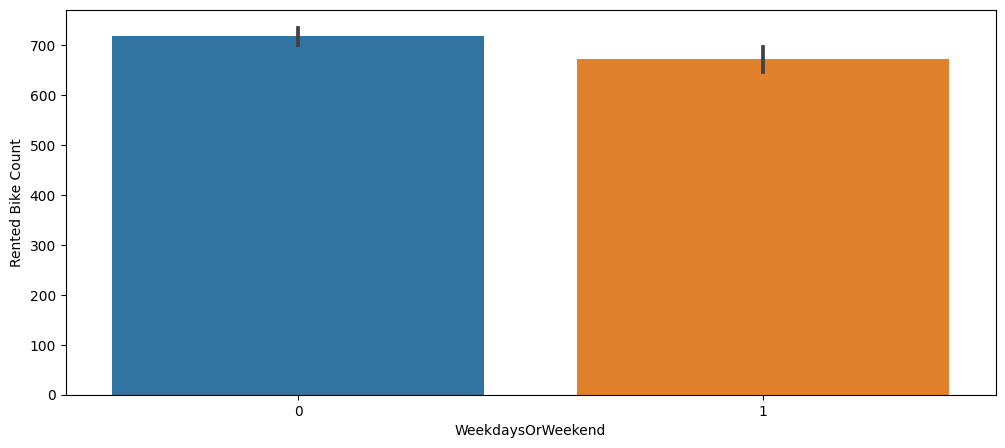

In [54]:
categorical_columns.extend(['Month','WeekdaysOrWeekend', 'Day'])

# plot barchart plot for each categorical columns 
for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x = data[col],y = data['Rented Bike Count'])

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

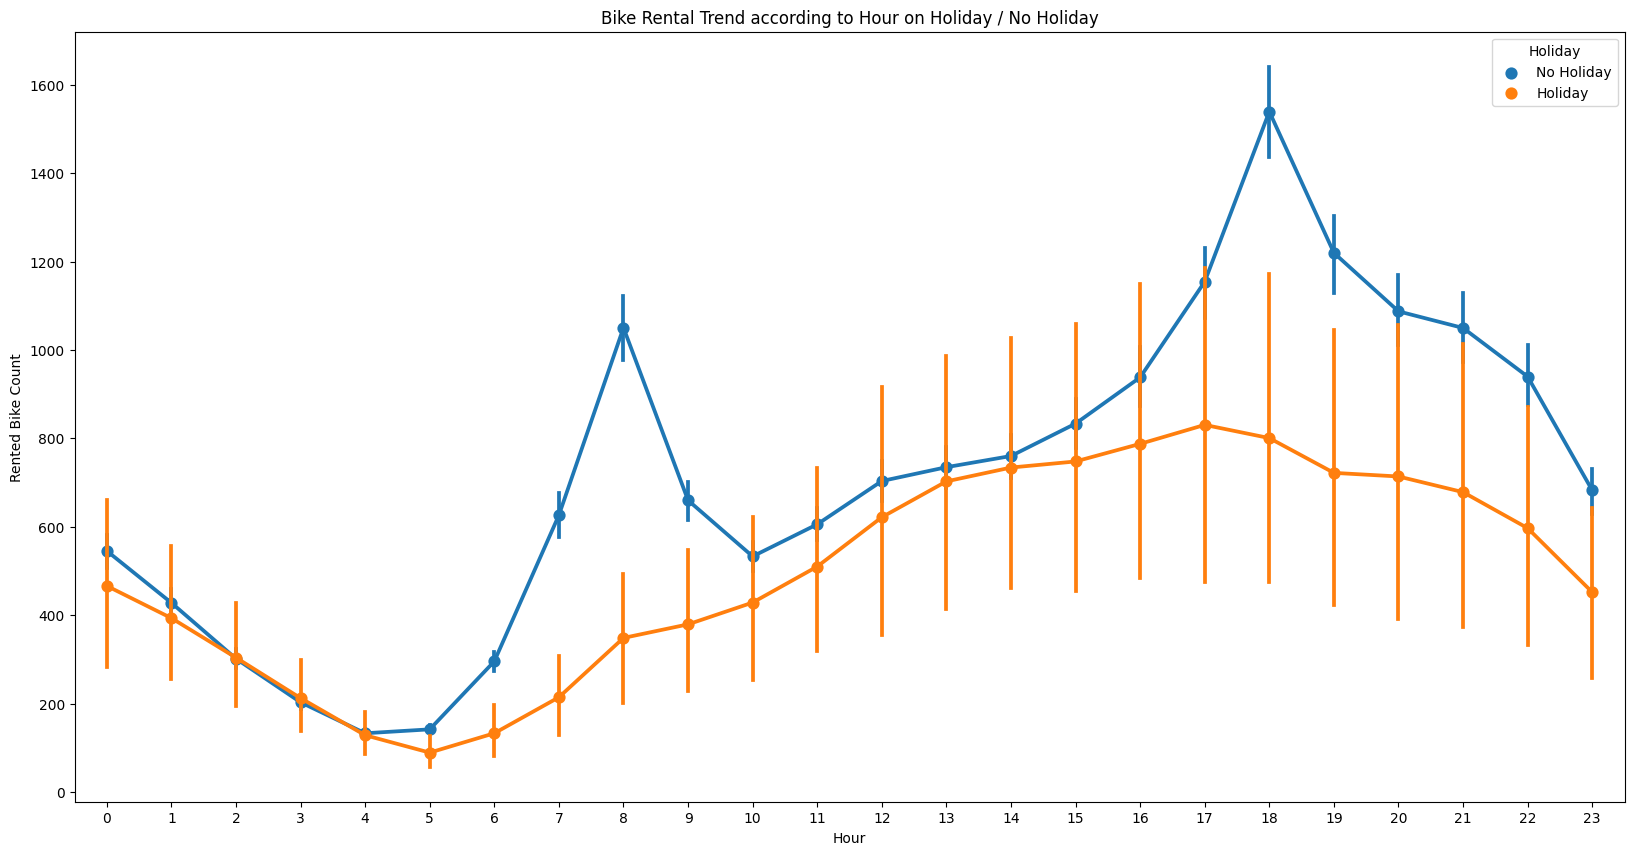

In [55]:
# Bike Rental trend with respect to Hour on Holiday or No Holiday.
plt.figure(figsize=(20,10))
sns.pointplot(x = data['Hour'],y = data['Rented Bike Count'],hue = data['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

In [56]:
# Bike Rental trend with respect to Hour on Functioning day.
plt.figure(figsize=(20,10))
sns.pointplot(x = data['Hour'],y = data['Rented Bike Count'],hue = data['Functioning Day'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

In [57]:
# filter the data where the bikes are functioning
data = data[data['Functioning Day'] == 'Yes']

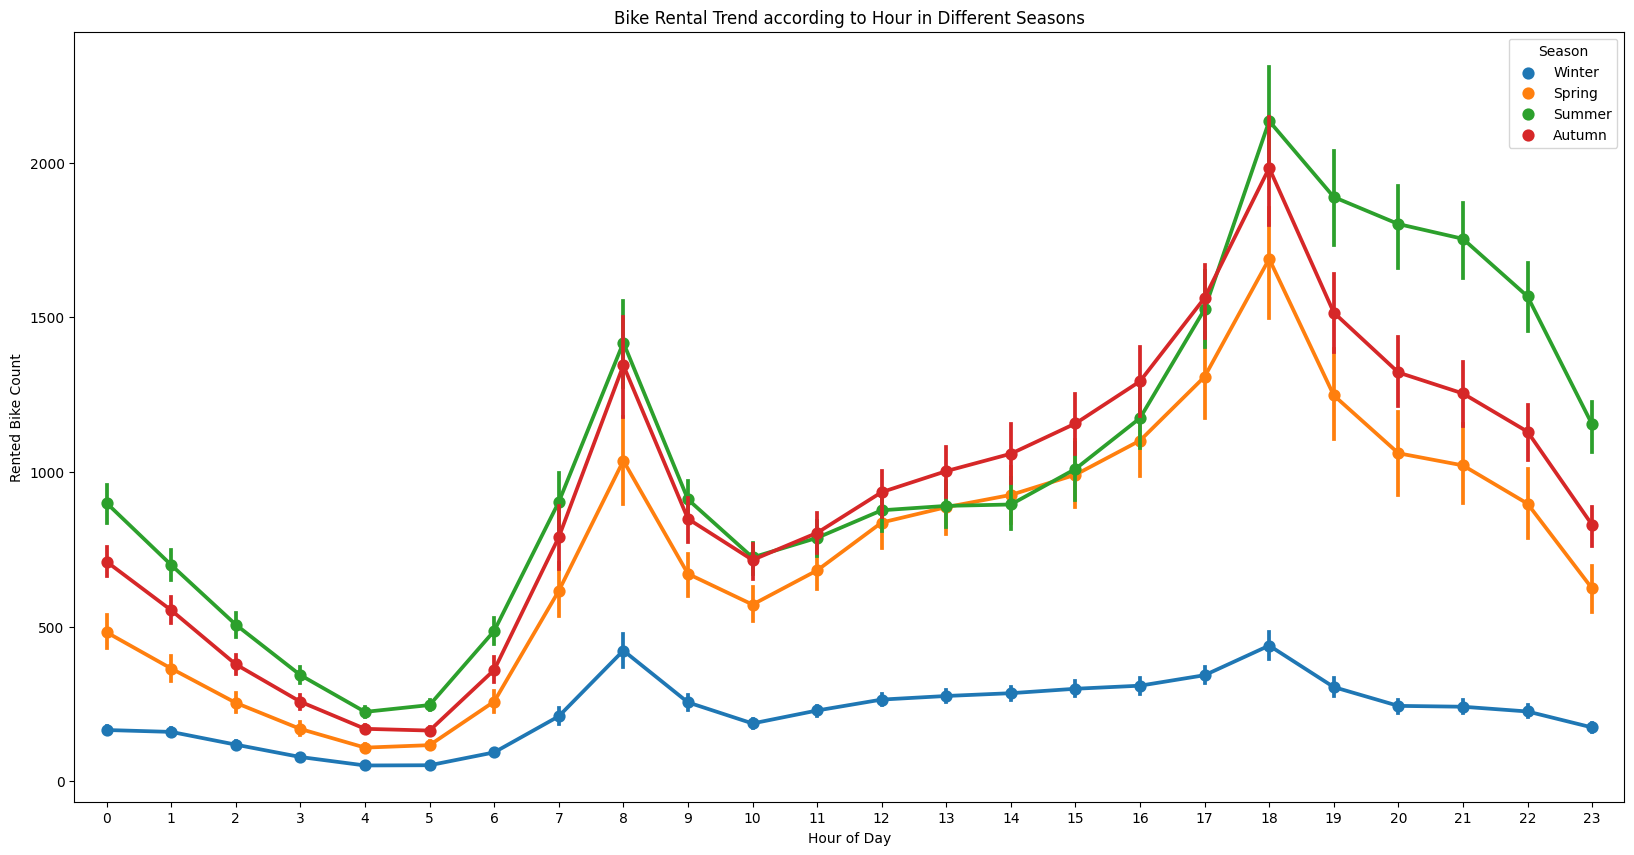

In [58]:
# Bike Rental trend to Hour on Seasons.
def get_season(row):
    if row['Seasons_Spring'] == 1:
        return 'Spring'
    elif row['Seasons_Summer'] == 1:
        return 'Summer'
    elif row['Seasons_Winter'] == 1:
        return 'Winter'
    else:
        return 'Autumn'

# create the new 'Season' column
data['Season'] = data.apply(get_season, axis=1)

# plot the bike rental trend to hour on seasons
plt.figure(figsize=(20, 10))
sns.pointplot(x=data['Hour'], y=data['Rented Bike Count'], hue=data['Season'])
plt.title("Bike Rental Trend according to Hour in Different Seasons")
plt.xlabel('Hour of Day')
plt.ylabel('Rented Bike Count')
plt.show()

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

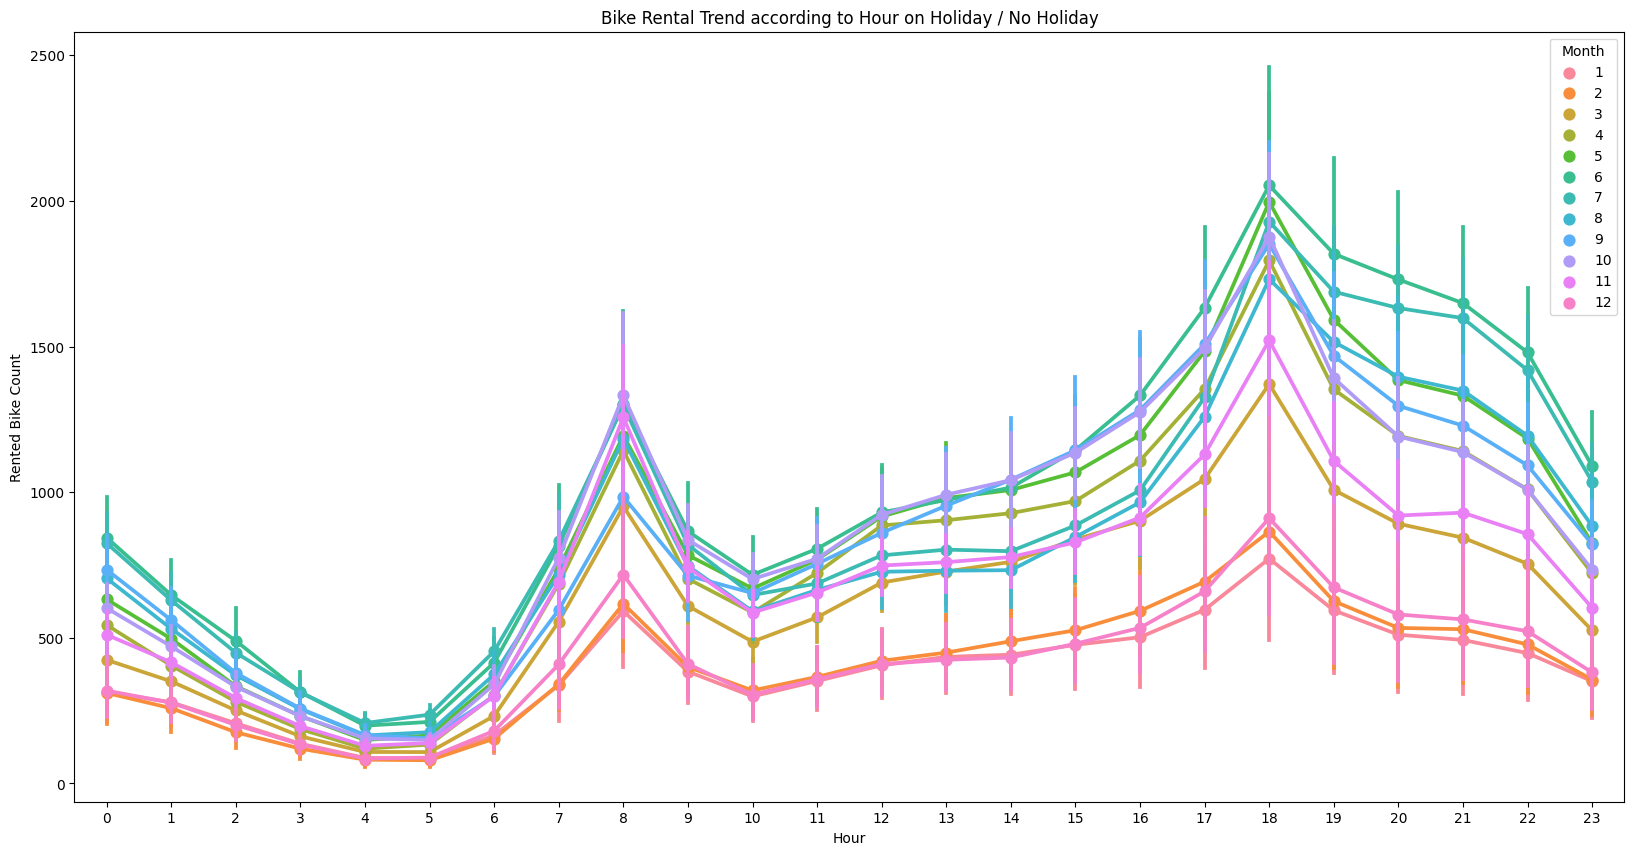

In [59]:
# Bike Rental trend with respect to Hour on Months.
plt.figure(figsize=(20,10))
sns.pointplot(x = data['Hour'],y = data['Rented Bike Count'],hue = data['Month'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

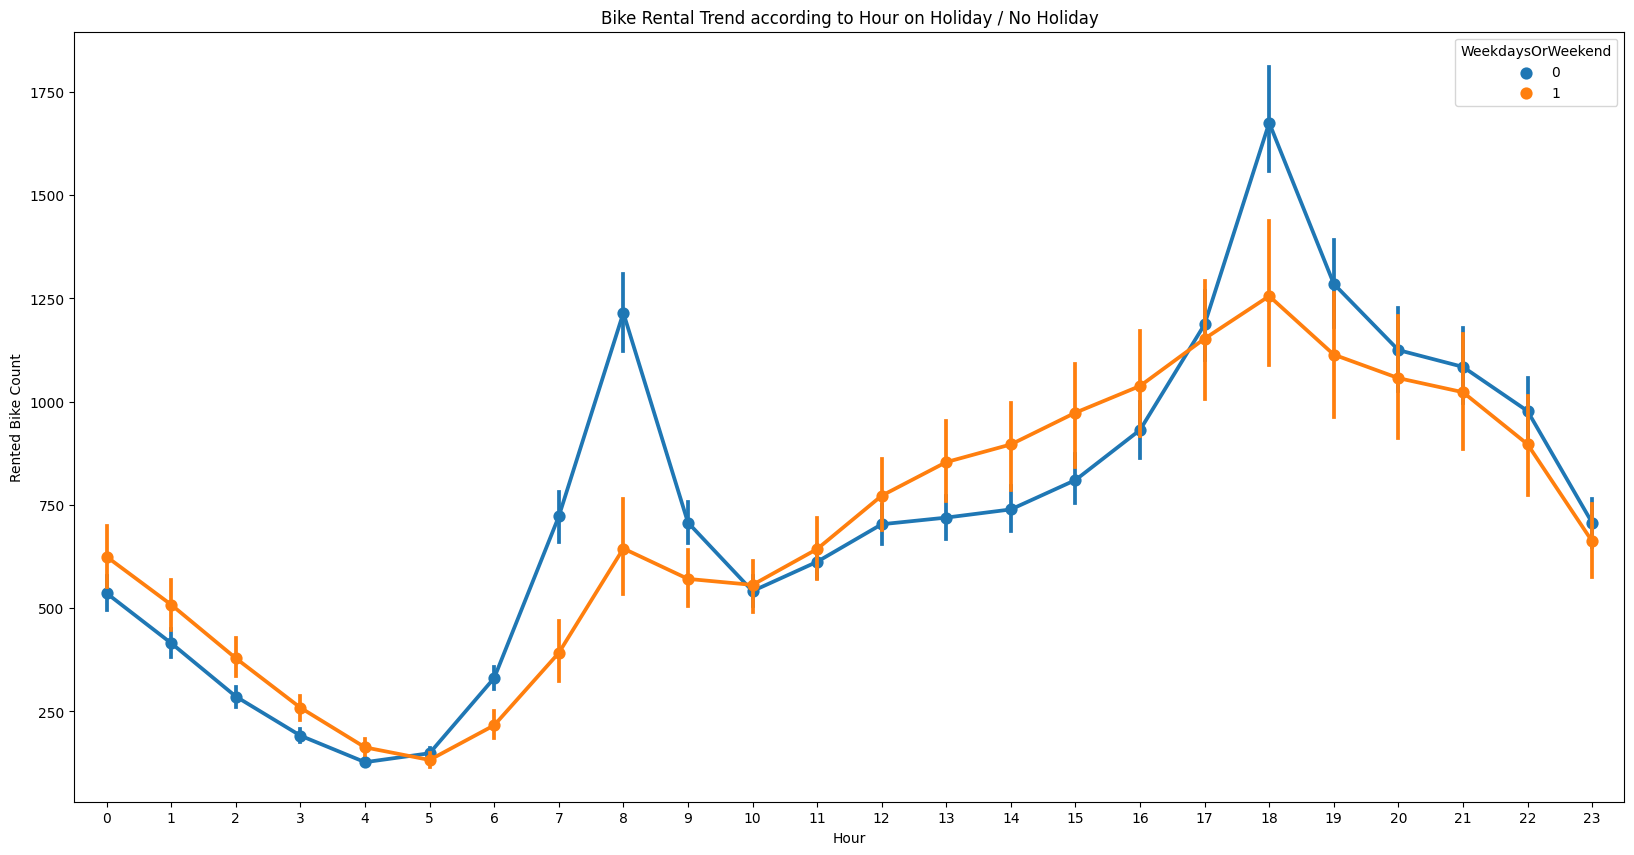

In [60]:
# Bike Rental trend with respect to Hour on Weekdays or weekend.
plt.figure(figsize=(20,10))
sns.pointplot(x = data['Hour'],y = data['Rented Bike Count'],hue = data['WeekdaysOrWeekend'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

C:\Users\Hui Zhen\AppData\Local\Temp\ipykernel_11860\2108774680.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= data['Rented Bike Count'],color='g',ax=axes[0])


<Axes: xlabel='Rented Bike Count'>

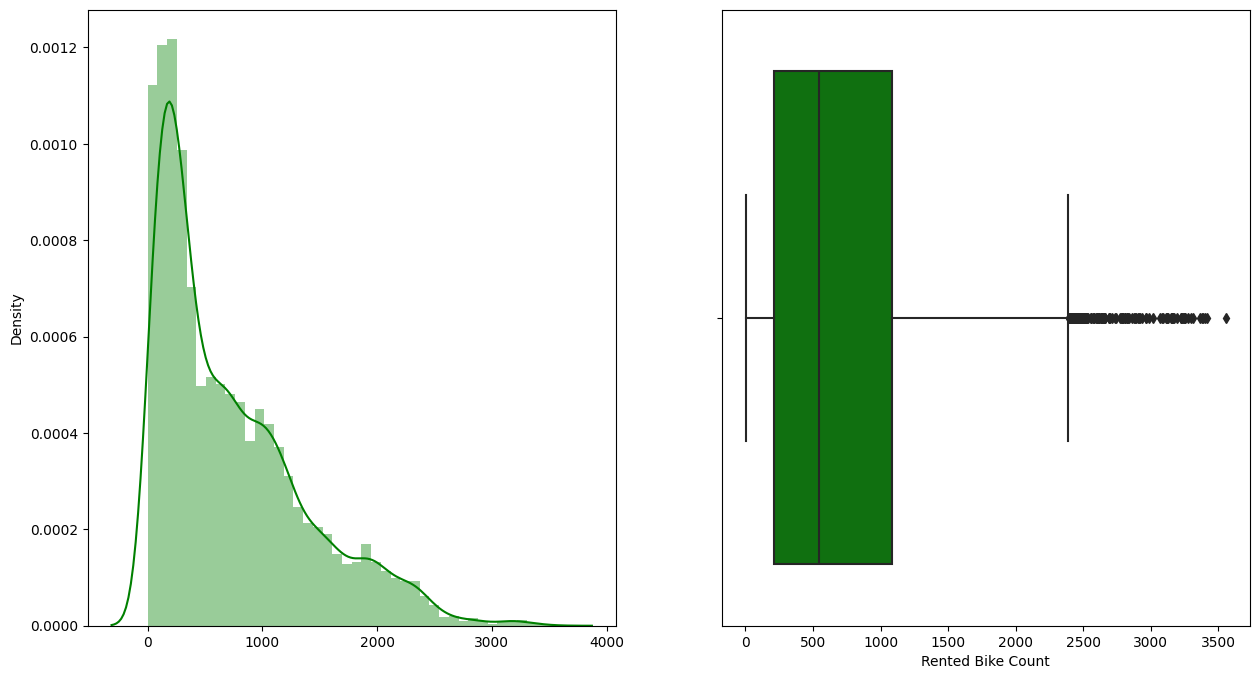

In [61]:
# Distrubution of target varible - "Rented Bike Count"
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= data['Rented Bike Count'],color='g',ax=axes[0])
sns.boxplot(x = data['Rented Bike Count'],color='g',ax=axes[1])

In [62]:
#from scipy import stats
#transformed_data, lambda_value = stats.boxcox(data['Rented Bike Count'] + 1)  # Adding 1 to avoid zero values

#transformed_data = np.power(data['Rented Bike Count'], 1/2)

# Create the subplots
#f, axes = plt.subplots(1, 2, figsize=(15, 8))

# Distribution plot with the transformed data (fourth root)
#sns.histplot(x=transformed_data, color='g', kde=True, ax=axes[0])

# Boxplot with the transformed data (fourth root)
#sns.boxplot(x=transformed_data, color='g', ax=axes[1])

#data['Rented Bike Count']= np.power(data['Rented Bike Count'], 1/2)


In [63]:
data.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

      Holiday Functioning Day  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0  No Holiday             Yes               0               0               0   
1  No Holiday             Yes               0               0               0   
2  No Holiday             Yes               0               0               0   
3  No Holiday             Yes               0               0               0   
4  No Holiday             Yes               0               0               0   

   Seasons_Winter  Month       Day  WeekdaysOrWeekend  Season  
0               1      1  Thursday                  0  Winter  
1               1      1  Thursday                  0  Winter  
2               1      1  Thursday                  0  Winter  
3               1      1  Thursday                  0  Winter  
4               1      1  Thursday                  0  Winter

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8465 non-null   int64  
 1   Hour                     8465 non-null   int64  
 2   Temperature(°C)          8465 non-null   float64
 3   Humidity(%)              8465 non-null   int64  
 4   Wind speed (m/s)         8465 non-null   float64
 5   Visibility (10m)         8465 non-null   int64  
 6   Solar Radiation (MJ/m2)  8465 non-null   float64
 7   Rainfall(mm)             8465 non-null   float64
 8   Snowfall (cm)            8465 non-null   float64
 9   Holiday                  8465 non-null   object 
 10  Functioning Day          8465 non-null   object 
 11  Seasons_Autumn           8465 non-null   uint8  
 12  Seasons_Spring           8465 non-null   uint8  
 13  Seasons_Summer           8465 non-null   uint8  
 14  Seasons_Winter          

In [65]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

# apply the mapping to the 'Day' column
data['Day'] = data['Day'].map(day_mapping)

In [66]:
holiday_mapping = {
    'No Holiday': 0,
    'Holiday': 1

}

# apply the mapping to the 'Day' column
data['Holiday'] = data['Holiday'].map(holiday_mapping)

In [67]:
data.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday Functioning Day  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0        0             Yes               0               0               0   
1        0             Yes               0               0               0   
2        0             Yes               0               0               0   
3        0             Yes               0               0               0   
4        0             Yes               0               0               0   

   Seasons_Winter  Month  Day  WeekdaysOrWeekend  Season  
0               1      1    4                  0  Winter  
1               1      1    4                  0  Winter  
2               1      1    4                  0  Winter  
3               1      1    4                  0  Winter  
4               1      1    4                  0  Winter

In [68]:
datacopy= data.copy()

In [69]:
datacopy.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday Functioning Day  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0        0             Yes               0               0               0   
1        0             Yes               0               0               0   
2        0             Yes               0               0               0   
3        0             Yes               0               0               0   
4        0             Yes               0               0               0   

   Seasons_Winter  Month  Day  WeekdaysOrWeekend  Season  
0               1      1    4                  0  Winter  
1               1      1    4                  0  Winter  
2               1      1    4                  0  Winter  
3               1      1    4                  0  Winter  
4               1      1    4                  0  Winter

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
   
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

Calculate_vif(datacopy[[i for i in datacopy.describe().columns if i not in ['Rented Bike Count']]])

variables        VIF
0                      Hour   1.207608
1           Temperature(°C)   5.211167
2               Humidity(%)   2.629867
3          Wind speed (m/s)   1.302777
4          Visibility (10m)   1.697441
5   Solar Radiation (MJ/m2)   1.933475
6              Rainfall(mm)   1.072406
7             Snowfall (cm)   1.119637
8                   Holiday   1.023915
9            Seasons_Autumn  19.503706
10           Seasons_Spring  18.353406
11           Seasons_Summer  26.656115
12           Seasons_Winter  16.419884
13                    Month   1.253228
14                      Day   2.715145
15        WeekdaysOrWeekend   2.711812

In [71]:
datacopy['Season'] = np.select(
    [
        datacopy['Seasons_Spring'] == 1,  # If spring
        datacopy['Seasons_Summer'] == 1,  # If summer
        datacopy['Seasons_Autumn'] == 1,  # If autumn
        datacopy['Seasons_Winter'] == 1   # If winter
    ],
    [
        'Spring',  
        'Summer',   
        'Autumn', 
        'Winter'    
    ],
    default='Unknown'  
)

# Drop the old one-hot encoded season columns
datacopy = datacopy.drop(columns=['Seasons_Spring', 'Seasons_Summer', 'Seasons_Autumn', 'Seasons_Winter'])


In [72]:
datacopy.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday Functioning Day  Month  Day  WeekdaysOrWeekend  Season  
0        0             Yes      1    4                  0  Winter  
1        0             Yes      1    4                  0  Winter  
2        0             Yes      1    4                  0  Winter  
3        0             Yes      1    4                  0  Winter  
4        0             Yes      1    4                  0  Winter

In [73]:
season_mapping = {
    'Spring': 1,
    'Summer': 2,
    'Autumn': 3,
    'Winter': 4
}

# apply the mapping to the 'Season' column
datacopy['Season'] = datacopy['Season'].map(season_mapping)

print(datacopy[['Season']].head()) 

   Season
0       4
1       4
2       4
3       4
4       4


In [74]:
#datacopy.drop('Visibility (10m)',inplace=True,axis=1)

In [75]:
def Calculate_vif(X):
   
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

Calculate_vif(datacopy[[i for i in datacopy.describe().columns if i not in ['Rented Bike Count']]])

variables        VIF
0                      Hour   4.165869
1           Temperature(°C)   4.425585
2               Humidity(%)   9.190187
3          Wind speed (m/s)   4.648060
4          Visibility (10m)   7.110870
5   Solar Radiation (MJ/m2)   2.347451
6              Rainfall(mm)   1.083966
7             Snowfall (cm)   1.141373
8                   Holiday   1.065297
9                     Month   4.789514
10                      Day  12.767451
11        WeekdaysOrWeekend   3.705662
12                   Season   8.303458

In [76]:
datacopy.drop('Day',inplace=True,axis=1)

In [77]:
def Calculate_vif(X):
   
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

Calculate_vif(datacopy[[i for i in datacopy.describe().columns if i not in ['Rented Bike Count']]])

variables       VIF
0                      Hour  4.135246
1           Temperature(°C)  4.425535
2               Humidity(%)  7.841528
3          Wind speed (m/s)  4.641614
4          Visibility (10m)  6.773683
5   Solar Radiation (MJ/m2)  2.315940
6              Rainfall(mm)  1.083628
7             Snowfall (cm)  1.138279
8                   Holiday  1.065254
9                     Month  4.789301
10        WeekdaysOrWeekend  1.399321
11                   Season  8.107883

In [78]:
datacopy.drop('Month',inplace=True,axis=1)

def Calculate_vif(X):
   
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

Calculate_vif(datacopy[[i for i in datacopy.describe().columns if i not in ['Rented Bike Count']]])

variables       VIF
0                      Hour  4.127299
1           Temperature(°C)  4.378754
2               Humidity(%)  7.334452
3          Wind speed (m/s)  4.627127
4          Visibility (10m)  6.528068
5   Solar Radiation (MJ/m2)  2.310323
6              Rainfall(mm)  1.082406
7             Snowfall (cm)  1.136651
8                   Holiday  1.064566
9         WeekdaysOrWeekend  1.398618
10                   Season  7.659273

In [79]:
datacopy.drop('Humidity(%)',inplace=True,axis=1)

def Calculate_vif(X):
   
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

Calculate_vif(datacopy[[i for i in datacopy.describe().columns if i not in ['Rented Bike Count']]])

variables       VIF
0                     Hour  4.127284
1          Temperature(°C)  2.526779
2         Wind speed (m/s)  4.422527
3         Visibility (10m)  6.486267
4  Solar Radiation (MJ/m2)  1.884935
5             Rainfall(mm)  1.049603
6            Snowfall (cm)  1.112749
7                  Holiday  1.064256
8        WeekdaysOrWeekend  1.384265
9                   Season  5.182577

In [80]:
datacopy.drop('Visibility (10m)',inplace=True,axis=1)

def Calculate_vif(X):
   
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

Calculate_vif(datacopy[[i for i in datacopy.describe().columns if i not in ['Rented Bike Count']]])

variables       VIF
0                     Hour  4.084958
1          Temperature(°C)  2.224849
2         Wind speed (m/s)  4.125849
3  Solar Radiation (MJ/m2)  1.882353
4             Rainfall(mm)  1.030992
5            Snowfall (cm)  1.096176
6                  Holiday  1.064231
7        WeekdaysOrWeekend  1.375216
8                   Season  3.498558

In [81]:
datacopy = datacopy[datacopy['Functioning Day'] == 'Yes']

# drop the 'Functioning Day' column after filtering
datacopy = datacopy.drop(columns=['Functioning Day'])

In [82]:
dependent_variable= 'Rented Bike Count'

In [83]:
independent_variable = list(set(datacopy.columns.tolist()) - {dependent_variable})

print(independent_variable)

['Solar Radiation (MJ/m2)', 'Hour', 'Snowfall (cm)', 'Rainfall(mm)', 'WeekdaysOrWeekend', 'Holiday', 'Wind speed (m/s)', 'Temperature(°C)', 'Season']


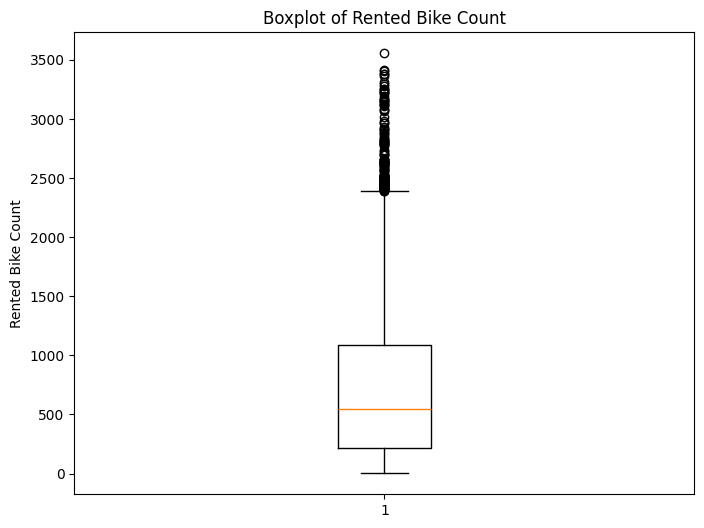

In [84]:
from sklearn.model_selection import train_test_split

# define the features (X) and the target variable (y)
X = datacopy.drop(columns=['Rented Bike Count'])  # Dropping the target column
y = datacopy['Rented Bike Count']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8,6))
plt.boxplot(y)
plt.title('Boxplot of Rented Bike Count')
plt.ylabel('Rented Bike Count')
plt.show()

In [85]:
X_train[0:10]

Hour  Temperature(°C)  Wind speed (m/s)  Solar Radiation (MJ/m2)  \
8691     3              3.5               1.6                     0.00   
6042    18             28.1               2.3                     0.28   
4788    12             28.4               2.2                     2.92   
6574    22             24.1               0.9                     0.00   
3716    20             14.1               3.4                     0.01   
2173    13              1.4               4.0                     2.95   
1583    23            -10.3               2.0                     0.00   
1412    20             -7.0               2.8                     0.00   
7934    14             10.8               4.4                     1.29   
7594    10             12.6               1.4                     1.68   

      Rainfall(mm)  Snowfall (cm)  Holiday  WeekdaysOrWeekend  Season  
8691           0.0            0.0        0                  0       3  
6042           0.5            0.0        0                  1       2  
4788           0.0            0.0        0                  0       2  
6574           0.0            0.0        0                  0       2  
3716           0.0            0.0        0                  0       1  
2173           0.0            0.0        1                  0       1  
1583           0.0            0.0        0                  0       4  
1412           0.0            0.0        0                  1       4  
7934           0.0            0.0        0                  1       3  
7594           0.0            0.0        0                  1       3

In [86]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # evaluate
    rmse = mean_squared_error(y_test, predictions, squared=False)  # RMSE
    r2 = r2_score(y_test, predictions)  # R-squared
    
    results[name] = {'RMSE': rmse, 'R-squared': r2}

# display results
for name, metrics in results.items():
    print(f"{name} Performance:")
    print(f"  RMSE: {metrics['RMSE']}")
    print(f"  R-squared: {metrics['R-squared']}\n")

Linear Regression Performance:
  RMSE: 448.571522092281
  R-squared: 0.48745950016204587

Ridge Regression Performance:
  RMSE: 448.57113414916967
  R-squared: 0.4874603866938938

Lasso Regression Performance:
  RMSE: 448.51423904462
  R-squared: 0.4875903957084231

ElasticNet Performance:
  RMSE: 448.8639399466326
  R-squared: 0.4867910455815032

Decision Tree Performance:
  RMSE: 310.19679651699084
  R-squared: 0.754902202989169

Random Forest Performance:
  RMSE: 228.9112237697568
  R-squared: 0.8665252963890335

Gradient Boosting Performance:
  RMSE: 258.9299652818989
  R-squared: 0.8292229854725948

Support Vector Regression Performance:
  RMSE: 452.39134109366205
  R-squared: 0.478693237770792

K-Nearest Neighbors Performance:
  RMSE: 285.2973435678976
  R-squared: 0.7926709075119748

XGBoost Performance:
  RMSE: 230.4327811182075
  R-squared: 0.8647450046800491



XGBoost Performance:
  RMSE: 230.4327811182075
  R-squared: 0.8647450046800491



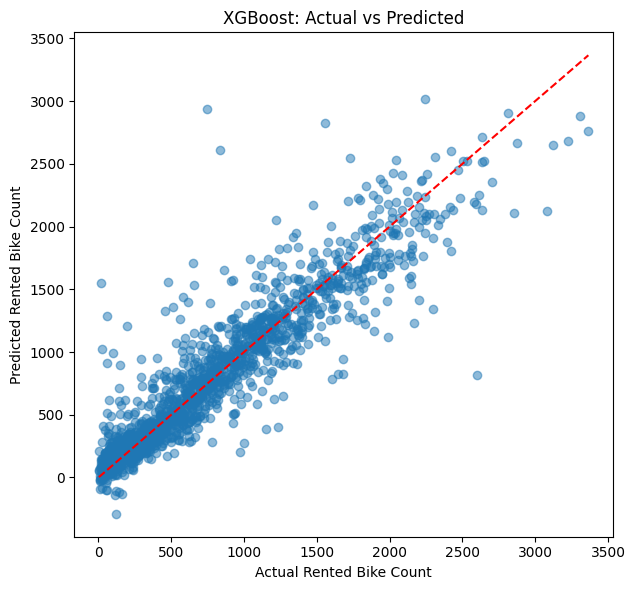

In [87]:
xgboost_model = XGBRegressor()

# train the models
xgboost_model.fit(X_train, y_train)

# make predictions
xgboost_predictions = xgboost_model.predict(X_test)

# calculate RMSE and R-squared for XGBoost
xgboost_rmse = mean_squared_error(y_test, xgboost_predictions, squared=False)
xgboost_r2 = r2_score(y_test, xgboost_predictions)


# print performance metrics
print("XGBoost Performance:")
print(f"  RMSE: {xgboost_rmse}")
print(f"  R-squared: {xgboost_r2}\n")

# plot actual vs predicted for both models
plt.figure(figsize=(12, 6))

# XGBoost plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, xgboost_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect fit
plt.title("XGBoost: Actual vs Predicted")
plt.xlabel("Actual Rented Bike Count")
plt.ylabel("Predicted Rented Bike Count")

plt.tight_layout()
plt.show()


In [88]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# define the model
xgb_model = XGBRegressor()

# define the parameters to be tuned
param_dist = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# random search with cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# best parameters
print("Best parameters found: ", random_search.best_params_)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 10, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


Test RMSE: 224.21
Test R²: 0.8719
Test MAPE: 45.55%


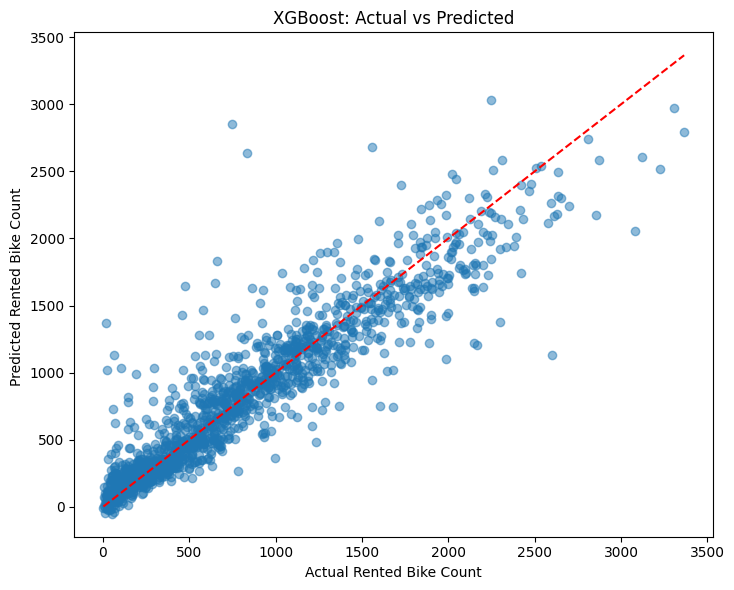

In [89]:
xgb_model = XGBRegressor(
    subsample=0.8,
    n_estimators=1000,
    min_child_weight=10,
    max_depth=6,
    learning_rate=0.01,
    colsample_bytree=1.0
)

xgb_model.fit(X_train, y_train, verbose=True)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# make predictions on the test set 
y_pred = xgb_model.predict(X_test)

# evaluate model performance 
mse_transformed = mean_squared_error(y_test, y_pred)
rmse_transformed = np.sqrt(mse_transformed)
r2_transformed = r2_score(y_test, y_pred)
# calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# print the evaluation metrics
print(f"Test RMSE: {rmse_transformed:.2f}")
print(f"Test R²: {r2_transformed:.4f}")
print(f"Test MAPE: {mape:.2f}%")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count ')
plt.title('XGBoost: Actual vs Predicted')

plt.tight_layout()
plt.show()


<Figure size 1000x800 with 0 Axes>

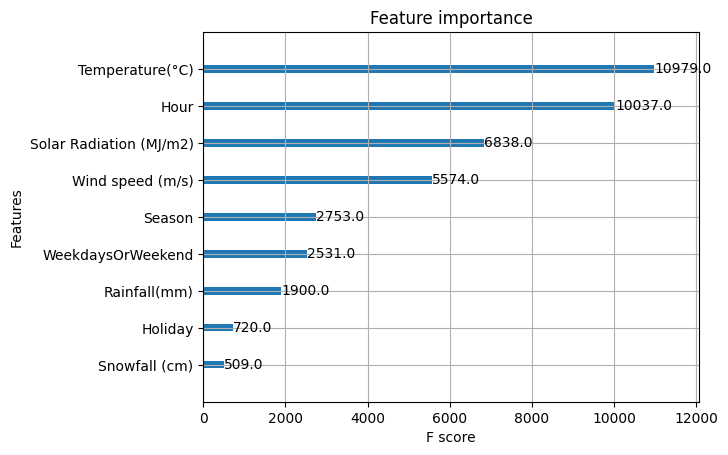

In [90]:
from xgboost import plot_importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model)
plt.show()

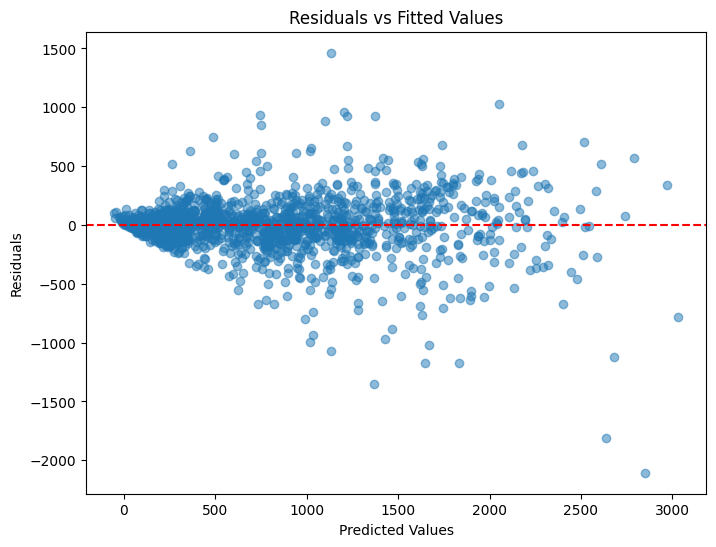

In [91]:
residuals = y_test - y_pred

# 1. Residuals vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [92]:
residuals_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residuals': residuals
})

# find the rows where the residuals are less than -10 or greater than 10 (adjust the threshold if needed)
outliers_df = residuals_df[(residuals_df['Residuals'] < -500) | (residuals_df['Residuals'] > 500)]

# display the outliers
print(outliers_df)

outlier_count = outliers_df.shape[0]
print(f"Number of outliers found: {outlier_count}")

print(residuals_df.nsmallest(5, 'Residuals'))

print(residuals_df.nlargest(5, 'Residuals'))

      Actual    Predicted   Residuals
6909    1259  1894.999268 -635.999268
7314    2857  2176.480713  680.519287
6980    2232  1731.115601  500.884399
2922    1296  1897.077393 -601.077393
4575    1890  1222.650146  667.349854
...      ...          ...         ...
6040     559  1280.881958 -721.881958
7455    2167  1206.945801  960.054199
2777     925  1617.797119 -692.797119
2251     289   892.880005 -603.880005
7207    1364   752.727905  611.272095

[75 rows x 3 columns]
Number of outliers found: 75
      Actual    Predicted    Residuals
4794     746  2851.985840 -2105.985840
5130     832  2638.937256 -1806.937256
3344      20  1368.365845 -1348.365845
4424     659  1834.192871 -1175.192871
4315     477  1646.127441 -1169.127441
      Actual    Predicted    Residuals
5155    2598  1133.917847  1464.082153
5178    3080  2053.396729  1026.603271
7455    2167  1206.945801   960.054199
2960    1677   743.220398   933.779602
4376    2149  1222.260986   926.739014


In [93]:
outliers_data = outliers_df.merge(datacopy, left_index=True, right_index=True)

pd.set_option('display.max_rows', None)

# print the outliers_data to see all rows
print(outliers_data)

# reset the display setting back to default
pd.reset_option('display.max_rows')

      Actual    Predicted    Residuals  Rented Bike Count  Hour  \
6909    1259  1894.999268  -635.999268               1259    21   
7314    2857  2176.480713   680.519287               2857    18   
6980    2232  1731.115601   500.884399               2232    20   
2922    1296  1897.077393  -601.077393               1296    18   
4575    1890  1222.650146   667.349854               1890    15   
6116    1208   605.118103   602.881897               1208    20   
4795    1557  2681.777100 -1124.777100               1557    19   
2970    2134  1629.848267   504.151733               2134    18   
6400     455  1428.152466  -973.152466                455    16   
7483    2150  1628.085327   521.914673               2150    19   
6473    1356  1967.163696  -611.163696               1356    17   
5129     861  1629.754761  -768.754761                861    17   
2288     997   364.094971   632.905029                997     8   
4630    1117  1619.274902  -502.274902               1117    2

In [94]:
outliers_hour_18 = outliers_data[outliers_data['Hour'] == 18]

# display the filtered data where Hour is 18
print(outliers_hour_18)

      Actual    Predicted    Residuals  Rented Bike Count  Hour  \
7314    2857  2176.480713   680.519287               2857    18   
2922    1296  1897.077393  -601.077393               1296    18   
2970    2134  1629.848267   504.151733               2134    18   
5178    3080  2053.396729  1026.603271               3080    18   
4170    3123  2608.882568   514.117432               3123    18   
8130    1335  1897.846802  -562.846802               1335    18   
2778    1477  1998.983643  -521.983643               1477    18   
4890    3365  2792.324707   572.675293               3365    18   
4410    2246  3029.437744  -783.437744               2246    18   
4482    3227  2518.722168   708.277832               3227    18   
4794     746  2851.985840 -2105.985840                746    18   
5130     832  2638.937256 -1806.937256                832    18   
3306    1727  2401.608643  -674.608643               1727    18   

      Temperature(°C)  Wind speed (m/s)  Solar Radiation (MJ/

In [95]:
outliers_hour_8 = outliers_data[outliers_data['Hour'] == 8]

# display the filtered data where Hour is 18
print(outliers_hour_8)

      Actual    Predicted    Residuals  Rented Bike Count  Hour  \
2288     997   364.094971   632.905029                997     8   
7688    2202  1638.589844   563.410156               2202     8   
7784     534  1124.656372  -590.656372                534     8   
6080     647  1669.232666 -1022.232666                647     8   
6944     464  1017.411255  -553.411255                464     8   
7136     296  1033.165039  -737.165039                296     8   
4424     659  1834.192871 -1175.192871                659     8   
3992     291   791.446106  -500.446106                291     8   
2960    1677   743.220398   933.779602               1677     8   
3344      20  1368.365845 -1348.365845                 20     8   
176      780   264.464996   515.535004                780     8   
8216     148   821.285767  -673.285767                148     8   
4376    2149  1222.260986   926.739014               2149     8   

      Temperature(°C)  Wind speed (m/s)  Solar Radiation (MJ/

In [96]:
datacopy8= datacopy[datacopy['Hour'] == 8]
pd.set_option('display.max_rows', None)
print(datacopy8)

      Rented Bike Count  Hour  Temperature(°C)  Wind speed (m/s)  \
8                   930     8             -7.6               1.1   
32                  219     8             -4.2               2.1   
56                   85     8              3.2               1.8   
80                  937     8             -0.8               3.5   
104                 812     8             -8.1               1.6   
128                 802     8             -4.2               0.0   
152                 754     8             -0.2               0.8   
176                 780     8             -7.0               0.8   
200                 222     8             -5.4               0.7   
224                  35     8             -0.2               1.2   
248                 653     8             -6.0               3.6   
272                 580     8            -12.3               1.3   
296                 591     8            -11.4               3.3   
320                 621     8            -10.4  

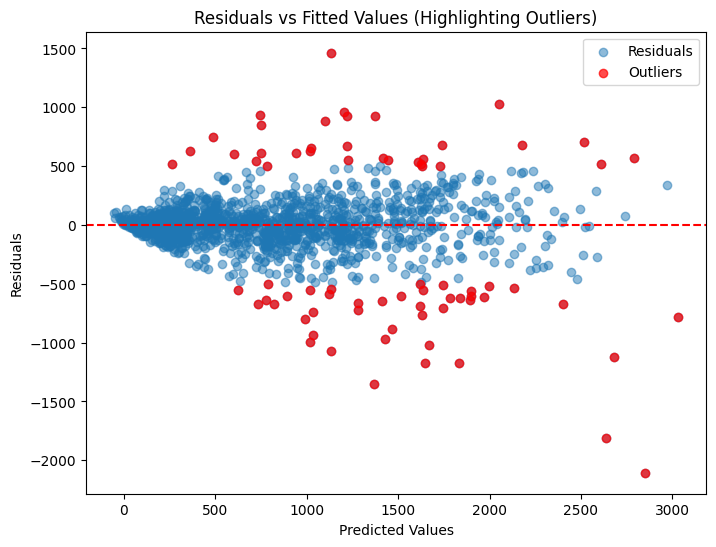

In [97]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, label='Residuals')
plt.scatter(outliers_df['Predicted'], outliers_df['Residuals'], color='red', label='Outliers', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values (Highlighting Outliers)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [98]:
# pivot table to analyze the distribution of Hour and Temperature in the dataset
hour_temp_distribution = pd.pivot_table(datacopy, index='Hour', columns='Temperature(°C)', aggfunc='size', fill_value=0)
pd.set_option('display.max_rows', None)
print(hour_temp_distribution)  # check how hours and temperature combinations are distributed



Temperature(°C)  -17.8  -17.5  -17.4  -16.9  -16.5  -16.4  -16.2  -16.1  \
Hour                                                                      
0                    0      0      0      0      0      0      0      0   
1                    0      0      0      0      0      0      0      1   
2                    0      0      0      0      0      0      0      0   
3                    0      0      0      0      0      0      0      0   
4                    0      0      0      0      0      1      0      0   
5                    0      0      0      1      0      0      0      0   
6                    0      0      1      0      0      0      0      1   
7                    0      1      0      0      0      0      1      0   
8                    1      0      0      0      0      1      1      0   
9                    0      1      0      0      0      0      1      0   
10                   0      0      0      0      1      0      0      0   
11                   0   

In [99]:
# frequency of each Hour-Temperature combination
hour_temp_count = datacopy.groupby(['Hour', 'Temperature(°C)']).size().reset_index(name='Count')

# set a threshold for minimum count (combinations with less than 2 occurrences are considered rare)
rare_combinations = hour_temp_count[hour_temp_count['Count'] < 2]

print(rare_combinations)


      Hour  Temperature(°C)  Count
0        0            -15.9      1
1        0            -15.1      1
2        0            -15.0      1
3        0            -14.6      1
4        0            -13.6      1
5        0            -12.3      1
6        0            -11.0      1
7        0            -10.6      1
8        0            -10.5      1
9        0            -10.4      1
10       0            -10.3      1
11       0            -10.0      1
13       0             -9.3      1
14       0             -8.2      1
15       0             -8.1      1
16       0             -7.9      1
17       0             -7.7      1
18       0             -7.5      1
19       0             -6.9      1
20       0             -6.6      1
22       0             -6.3      1
23       0             -6.1      1
24       0             -5.9      1
25       0             -5.7      1
26       0             -5.3      1
28       0             -5.0      1
29       0             -4.9      1
30       0          

In [100]:
datacopy['Temp'] = pd.cut(datacopy['Temperature(°C)'], bins=range(-30, 51, 5), right=False)

# display the first few rows to verify the bins
print(datacopy[['Temperature(°C)', 'Temp']].head())

   Temperature(°C)       Temp
0             -5.2  [-10, -5)
1             -5.5  [-10, -5)
2             -6.0  [-10, -5)
3             -6.2  [-10, -5)
4             -6.0  [-10, -5)


In [101]:
hour_temp_count = datacopy.groupby(['Hour', 'Temp']).size().reset_index(name='Count')

# display the counts to see the distribution
print(hour_temp_count)

     Hour        Temp  Count
0       0  [-30, -25)      0
1       0  [-25, -20)      0
2       0  [-20, -15)      2
3       0  [-15, -10)      9
4       0   [-10, -5)     21
5       0     [-5, 0)     40
6       0      [0, 5)     43
7       0     [5, 10)     47
8       0    [10, 15)     42
9       0    [15, 20)     44
10      0    [20, 25)     60
11      0    [25, 30)     36
12      0    [30, 35)      8
13      0    [35, 40)      0
14      0    [40, 45)      0
15      0    [45, 50)      0
16      1  [-30, -25)      0
17      1  [-25, -20)      0
18      1  [-20, -15)      3
19      1  [-15, -10)     10
20      1   [-10, -5)     22
21      1     [-5, 0)     38
22      1      [0, 5)     45
23      1     [5, 10)     47
24      1    [10, 15)     42
25      1    [15, 20)     48
26      1    [20, 25)     55
27      1    [25, 30)     37
28      1    [30, 35)      5
29      1    [35, 40)      0
30      1    [40, 45)      0
31      1    [45, 50)      0
32      2  [-30, -25)      0
33      2  [-2

In [102]:
threshold = 2  
rare_combinations = hour_temp_count[hour_temp_count['Count'] < threshold]

print(rare_combinations)


     Hour        Temp  Count
0       0  [-30, -25)      0
1       0  [-25, -20)      0
13      0    [35, 40)      0
14      0    [40, 45)      0
15      0    [45, 50)      0
16      1  [-30, -25)      0
17      1  [-25, -20)      0
29      1    [35, 40)      0
30      1    [40, 45)      0
31      1    [45, 50)      0
32      2  [-30, -25)      0
33      2  [-25, -20)      0
45      2    [35, 40)      0
46      2    [40, 45)      0
47      2    [45, 50)      0
48      3  [-30, -25)      0
49      3  [-25, -20)      0
61      3    [35, 40)      0
62      3    [40, 45)      0
63      3    [45, 50)      0
64      4  [-30, -25)      0
65      4  [-25, -20)      0
77      4    [35, 40)      0
78      4    [40, 45)      0
79      4    [45, 50)      0
80      5  [-30, -25)      0
81      5  [-25, -20)      0
93      5    [35, 40)      0
94      5    [40, 45)      0
95      5    [45, 50)      0
96      6  [-30, -25)      0
97      6  [-25, -20)      0
109     6    [35, 40)      0
110     6    [

In [103]:
datacopy = datacopy.merge(rare_combinations[['Hour', 'Temp']], 
                                  on=['Hour', 'Temp'], 
                                  how='left', 
                                  indicator='_merge_indicator')
datacopy = datacopy[datacopy['_merge_indicator'] == 'left_only']

# drop the merge indicator column as it's no longer needed
datacopy.drop(columns='_merge_indicator', inplace=True)

print(datacopy.head())

   Rented Bike Count  Hour  Temperature(°C)  Wind speed (m/s)  \
0                254     0             -5.2               2.2   
1                204     1             -5.5               0.8   
2                173     2             -6.0               1.0   
3                107     3             -6.2               0.9   
4                 78     4             -6.0               2.3   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
0                      0.0           0.0            0.0        0   
1                      0.0           0.0            0.0        0   
2                      0.0           0.0            0.0        0   
3                      0.0           0.0            0.0        0   
4                      0.0           0.0            0.0        0   

   WeekdaysOrWeekend  Season       Temp  
0                  0       4  [-10, -5)  
1                  0       4  [-10, -5)  
2                  0       4  [-10, -5)  
3                  0       4  [-

In [104]:
# drop the Temp_Bin column and _merge column if not already dropped
datacopy = datacopy.drop(columns=['Temperature(°C)', '_merge'], errors='ignore')

# check the data types to ensure no categorical columns remain
print(datacopy.dtypes)


Rented Bike Count             int64
Hour                          int64
Wind speed (m/s)            float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Holiday                       int64
WeekdaysOrWeekend             int64
Season                        int64
Temp                       category
dtype: object


In [105]:
datacopy = pd.get_dummies(datacopy, columns=['Temp'], drop_first=True)

# clean the column names by removing unwanted characters like brackets and commas
datacopy.columns = datacopy.columns.str.replace(r'[\[\],]', '', regex=True)

datacopy.columns = datacopy.columns.str.replace(' ', '_')


In [106]:
datacopy.head()

Rented_Bike_Count  Hour  Wind_speed_(m/s)  Solar_Radiation_(MJ/m2)  \
0                254     0               2.2                      0.0   
1                204     1               0.8                      0.0   
2                173     2               1.0                      0.0   
3                107     3               0.9                      0.0   
4                 78     4               2.3                      0.0   

   Rainfall(mm)  Snowfall_(cm)  Holiday  WeekdaysOrWeekend  Season  \
0           0.0            0.0        0                  0       4   
1           0.0            0.0        0                  0       4   
2           0.0            0.0        0                  0       4   
3           0.0            0.0        0                  0       4   
4           0.0            0.0        0                  0       4   

   Temp_-25_-20)  ...  Temp_0_5)  Temp_5_10)  Temp_10_15)  Temp_15_20)  \
0              0  ...          0           0            0            0   
1              0  ...          0           0            0            0   
2              0  ...          0           0            0            0   
3              0  ...          0           0            0            0   
4              0  ...          0           0            0            0   

   Temp_20_25)  Temp_25_30)  Temp_30_35)  Temp_35_40)  Temp_40_45)  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Temp_45_50)  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 24 columns]

In [107]:
datacopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8462 entries, 0 to 8464
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented_Bike_Count        8462 non-null   int64  
 1   Hour                     8462 non-null   int64  
 2   Wind_speed_(m/s)         8462 non-null   float64
 3   Solar_Radiation_(MJ/m2)  8462 non-null   float64
 4   Rainfall(mm)             8462 non-null   float64
 5   Snowfall_(cm)            8462 non-null   float64
 6   Holiday                  8462 non-null   int64  
 7   WeekdaysOrWeekend        8462 non-null   int64  
 8   Season                   8462 non-null   int64  
 9   Temp_-25_-20)            8462 non-null   uint8  
 10  Temp_-20_-15)            8462 non-null   uint8  
 11  Temp_-15_-10)            8462 non-null   uint8  
 12  Temp_-10_-5)             8462 non-null   uint8  
 13  Temp_-5_0)               8462 non-null   uint8  
 14  Temp_0_5)               

In [108]:
# ensure that Temp columns are numeric and binary 
temp_columns = [col for col in datacopy.columns if 'Temp_' in col]
datacopy[temp_columns] = datacopy[temp_columns].apply(pd.to_numeric, errors='coerce')

datacopy[temp_columns] = datacopy[temp_columns].clip(0, 1)

# find the temperature range for each row
datacopy['Temp_Range'] = datacopy[temp_columns].idxmax(axis=1)

print(datacopy[['Hour', 'Temp_Range']].head()) 

# combine 'Hour' and 'Temp_Range' to create the 'Hour_Temp_Group' column
datacopy['Hour_Temp_Group'] = datacopy['Hour'].astype(str) + "_" + datacopy['Temp_Range']

print(datacopy[['Hour', 'Temp_Range', 'Hour_Temp_Group']].head())

# perform stratified sampling based on the combined 'Hour_Temp_Group'
from sklearn.model_selection import train_test_split

# drop the Temp_Range column as it's not needed for training
X = datacopy.drop(columns=['Rented_Bike_Count', 'Hour_Temp_Group', 'Temp_Range'])

y = datacopy['Rented_Bike_Count']  

# perform stratified train-test split based on the 'Hour_Temp_Group'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=datacopy['Hour_Temp_Group'], random_state=42)

# initialize the XGBoost model
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.4f}")





   Hour    Temp_Range
0     0  Temp_-10_-5)
1     1  Temp_-10_-5)
2     2  Temp_-10_-5)
3     3  Temp_-10_-5)
4     4  Temp_-10_-5)
   Hour    Temp_Range Hour_Temp_Group
0     0  Temp_-10_-5)  0_Temp_-10_-5)
1     1  Temp_-10_-5)  1_Temp_-10_-5)
2     2  Temp_-10_-5)  2_Temp_-10_-5)
3     3  Temp_-10_-5)  3_Temp_-10_-5)
4     4  Temp_-10_-5)  4_Temp_-10_-5)
Test RMSE: 237.53
Test R²: 0.8658


In [109]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Best fit line

plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title(f'Actual vs Predicted Values (RMSE: {rmse:.2f}, R²: {r2:.4f})')
plt.show()

In [110]:
# define the model
xgb_model = XGBRegressor()

# define the parameters to be tuned
param_dist = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# random search with cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# best parameters
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 10, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 0.7}


In [111]:
xgb_model = XGBRegressor(
    subsample=0.8,
    n_estimators=1000,
    min_child_weight=9,
    max_depth=6,
    learning_rate=0.01,
    colsample_bytree=1.0
)

xgb_model.fit(X_train, y_train, verbose=True)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

y_pred = xgb_model.predict(X_test)

mse_transformed = mean_squared_error(y_test, y_pred)
rmse_transformed = np.sqrt(mse_transformed)
r2_transformed = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse_transformed}")
print(f"R-squared (R²): {r2_transformed}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Rented Bike Count ')
plt.ylabel('Predicted Rented Bike Count )')
plt.title('XGBoost: Actual vs Predicted ')

plt.tight_layout()
plt.show()

Root Mean Squared Error (RMSE): 238.176511821632
R-squared (R²): 0.8650434265891149


In [112]:
datacopy = datacopy[~((datacopy['Hour'] == 18) & (datacopy['Rented_Bike_Count'] < 1000))]


Root Mean Squared Error (RMSE): 233.59544712260026
R-squared (R²): 0.8721887763890332


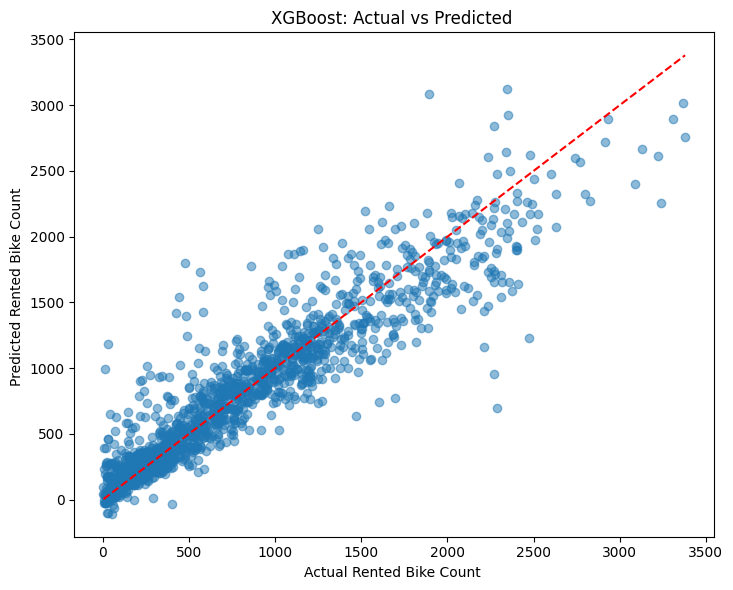

In [113]:
X = datacopy.drop(columns=['Rented_Bike_Count', 'Hour_Temp_Group', 'Temp_Range']) 
y = datacopy['Rented_Bike_Count']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=datacopy['Hour_Temp_Group'], random_state=42)

xgb_model = XGBRegressor(
    subsample=0.8,
    n_estimators=1000,
    min_child_weight=9,
    max_depth=6,
    learning_rate=0.01,
    colsample_bytree=1.0
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

rmse_transformed = np.sqrt(mean_squared_error(y_test, y_pred))
r2_transformed = r2_score(y_test, y_pred)

# Print RMSE and R-squared 
print(f"Root Mean Squared Error (RMSE): {rmse_transformed}")
print(f"R-squared (R²): {r2_transformed}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Rented Bike Count ')
plt.ylabel('Predicted Rented Bike Count ')
plt.title('XGBoost: Actual vs Predicted ')

plt.tight_layout()
plt.show()


In [114]:
xgb_model = XGBRegressor()

# define the parameters to be tuned
param_dist = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# random search with cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=50, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 10, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


Test RMSE: 233.01
Test R²: 0.8728
Test MAPE: 55.88%
Outliers found (top 5% of residuals):
      Actual    Predicted    Residuals
7258    2255  1712.777954   542.222046
4533     225   934.706421  -709.706421
4988    1039  1729.372681  -690.372681
6862     567  1729.471924 -1162.471924
4624    2474  1280.610107  1193.389893
6550     992  1639.578491  -647.578491
3881    2410  1624.882935   785.117065
4520     963  1686.189331  -723.189331
6349     274   947.533386  -673.533386
2936    1469   660.247070   808.752930
4423    1602   754.567871   847.432129
4386    2349  3115.767090  -766.767090
6258    2628  2049.887207   578.112793
2898    1391  1955.240234  -564.240234
7297    2082  1465.033813   616.966187
3186    2404  1877.963013   526.036987
8209    1818  1227.529785   590.470215
4410    3380  2740.833740   639.166260
7095    2170  1566.463013   603.536987
7193    2400  1850.520752   549.479248
6408     325   924.232666  -599.232666
4256    2234  1435.066650   798.933350
2802    1521 

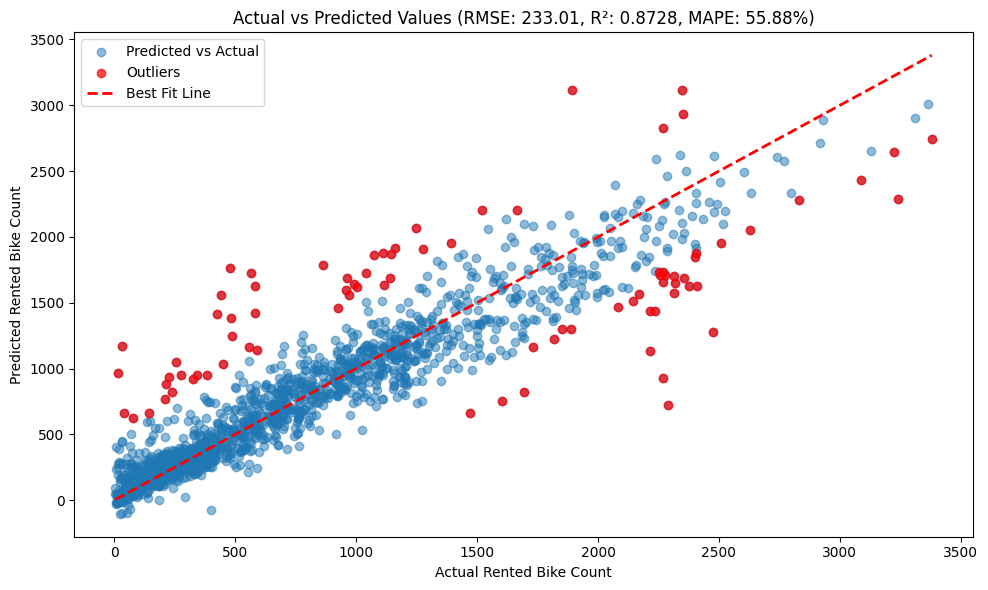

In [115]:
# train and make prediction
xgb_model = XGBRegressor(
    n_estimators=1000,     
    learning_rate=0.01,     
    max_depth=6,           
    min_child_weight=9,    
    subsample=0.8,        
    colsample_bytree=1.0,  
    random_state=42        
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# calculate RMSE, R-squared, and MAPE (error rate)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Test RMSE: {rmse:.2f}")
print(f"Test R²: {r2:.4f}")
print(f"Test MAPE: {mape:.2f}%")

# calculate residuals
residuals = y_test - y_pred

# threshold
residual_threshold = np.abs(residuals).quantile(0.95)  # Top 5% of residuals

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residuals': residuals
})

# identify outliers 
outliers_df = results_df[np.abs(results_df['Residuals']) > residual_threshold]

print("Outliers found (top 5% of residuals):")
print(outliers_df)

# plot actual vs predicted values and highlight the outliers
plt.figure(figsize=(10, 6))

plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.5, label='Predicted vs Actual')

plt.scatter(outliers_df['Actual'], outliers_df['Predicted'], color='red', alpha=0.7, label='Outliers')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Best Fit Line')

plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title(f'Actual vs Predicted Values (RMSE: {rmse:.2f}, R²: {r2:.4f}, MAPE: {mape:.2f}%)')

plt.legend()

plt.tight_layout()
plt.show()


In [116]:
outliers_data = outliers_df.merge(datacopy, left_index=True, right_index=True)

pd.set_option('display.max_rows', None)

print(outliers_data)

pd.reset_option('display.max_rows')

      Actual    Predicted    Residuals  Rented_Bike_Count  Hour  \
7258    2255  1712.777954   542.222046               2255    17   
4533     225   934.706421  -709.706421                225    21   
4988    1039  1729.372681  -690.372681               1039    20   
6862     567  1729.471924 -1162.471924                567    22   
4624    2474  1280.610107  1193.389893               2474    16   
6550     992  1639.578491  -647.578491                992    22   
3881    2410  1624.882935   785.117065               2410    17   
4520     963  1686.189331  -723.189331                963     8   
6349     274   947.533386  -673.533386                274    13   
2936    1469   660.247070   808.752930               1469     8   
4423    1602   754.567871   847.432129               1602     7   
4386    2349  3115.767090  -766.767090               2349    18   
6258    2628  2049.887207   578.112793               2628    18   
2898    1391  1955.240234  -564.240234               1391    1

In [117]:
# calculate average 'Rented_Bike_Count' grouped by 'Hour' and 'Temp_Range'
hour_temp_avg = datacopy.groupby(['Hour', 'Temp_Range'])['Rented_Bike_Count'].mean().reset_index()

hour_temp_avg.rename(columns={'Rented_Bike_Count': 'Average_Bike_Count'}, inplace=True)

# merge the outliers data with 'Hour' and 'Temp_Range'
outliers_with_temp_range = outliers_df.merge(datacopy[['Hour', 'Temp_Range']], left_index=True, right_index=True)

# create a unique set of (Hour, Temp_Range) pairs from the outliers
outlier_groups = outliers_with_temp_range[['Hour', 'Temp_Range']].drop_duplicates()

# filter hour_temp_avg to include only rows found in outliers
outlier_hour_temp_avg = hour_temp_avg.merge(outlier_groups, on=['Hour', 'Temp_Range'])

# merge the outliers with the average bike count to display both actual and average values
outliers_with_avg = outliers_with_temp_range.merge(outlier_hour_temp_avg, on=['Hour', 'Temp_Range'], how='left')

# set display option to show all rows
pd.set_option('display.max_rows', None)

# display the result with both outlier values and average values
print(outliers_with_avg[['Hour', 'Temp_Range', 'Average_Bike_Count', 'Actual', 'Predicted']])

pd.reset_option('display.max_rows')




    Hour   Temp_Range  Average_Bike_Count  Actual    Predicted
0     17  Temp_15_20)         1549.222222    2255  1712.777954
1     21  Temp_20_25)         1681.063492     225   934.706421
2     20  Temp_20_25)         1651.923077    1039  1729.372681
3     22  Temp_20_25)         1503.688525     567  1729.471924
4     16  Temp_25_30)         1506.298246    2474  1280.610107
5     22  Temp_25_30)         1616.871795     992  1639.578491
6     17  Temp_15_20)         1549.222222    2410  1624.882935
7      8  Temp_20_25)         1441.890909     963  1686.189331
8     13  Temp_25_30)         1132.854545     274   947.533386
9      8  Temp_15_20)         1204.116279    1469   660.247070
10     7  Temp_15_20)          844.056604    1602   754.567871
11    18  Temp_25_30)         2687.478261    2349  3115.767090
12    18  Temp_30_35)         2245.848485    2628  2049.887207
13    18  Temp_15_20)         2128.750000    1391  1955.240234
14     8  Temp_10_15)         1212.325000    2082  1465

In [118]:
# List of outlier indices to be removed
outlier_indices = [7258, 6349, 4423, 7297, 8209, 7873, 7959, 2504, 2587, 3022, 7954, 4267, 5081]

# remove rows with these indices from datacopy
datacopy_cleaned = datacopy.drop(outlier_indices)

# verify that the outliers are removed
print(f"Original dataset size: {datacopy.shape[0]}")
print(f"Dataset size after removing outliers: {datacopy_cleaned.shape[0]}")

print(datacopy_cleaned.head())


Original dataset size: 8326
Dataset size after removing outliers: 8313
   Rented_Bike_Count  Hour  Wind_speed_(m/s)  Solar_Radiation_(MJ/m2)  \
0                254     0               2.2                      0.0   
1                204     1               0.8                      0.0   
2                173     2               1.0                      0.0   
3                107     3               0.9                      0.0   
4                 78     4               2.3                      0.0   

   Rainfall(mm)  Snowfall_(cm)  Holiday  WeekdaysOrWeekend  Season  \
0           0.0            0.0        0                  0       4   
1           0.0            0.0        0                  0       4   
2           0.0            0.0        0                  0       4   
3           0.0            0.0        0                  0       4   
4           0.0            0.0        0                  0       4   

   Temp_-25_-20)  ...  Temp_10_15)  Temp_15_20)  Temp_20_25)  Temp_25

Root Mean Squared Error (RMSE): 222.73
R-squared (R²): 0.8812


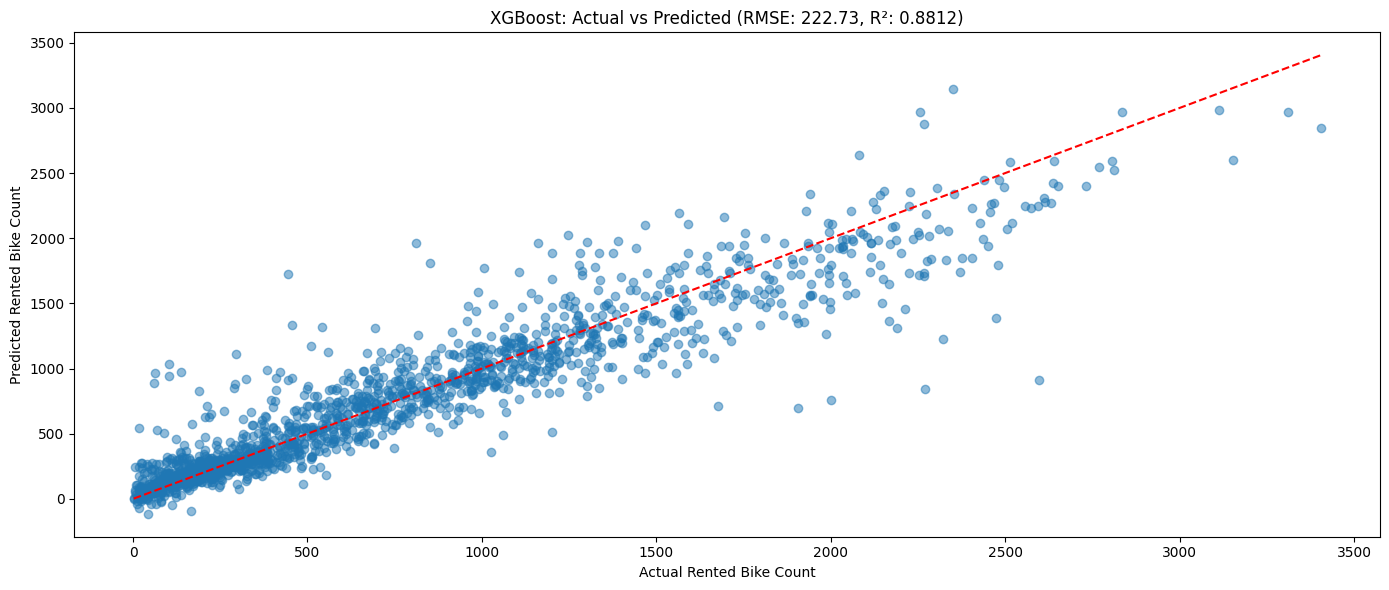

In [119]:
X_cleaned = datacopy_cleaned.drop(columns=['Rented_Bike_Count', 'Hour_Temp_Group', 'Temp_Range'])  
y_cleaned = datacopy_cleaned['Rented_Bike_Count']  # Target variable

# perform stratified train-test split based on the 'Hour_Temp_Group'
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, stratify=datacopy_cleaned['Hour_Temp_Group'], random_state=42)

# train the model with the updated dataset
xgb_model = XGBRegressor(
    subsample=0.8,
    n_estimators=1000,
    min_child_weight=9,
    max_depth=6,
    learning_rate=0.01,
    colsample_bytree=1.0
)

# train the model
xgb_model.fit(X_train_cleaned, y_train_cleaned)

# make predictions on the test set
y_pred_cleaned = xgb_model.predict(X_test_cleaned)

rmse_transformed = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned))
r2_transformed = r2_score(y_test_cleaned, y_pred_cleaned)

print(f"Root Mean Squared Error (RMSE): {rmse_transformed:.2f}")
print(f"R-squared (R²): {r2_transformed:.4f}")
#mape = np.mean(np.abs((y_test_cleaned - y_pred_cleaned) / y_test_cleaned)) * 100

#print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

plt.figure(figsize=(14, 6))

plt.scatter(y_test_cleaned, y_pred_cleaned, alpha=0.5)
plt.plot([y_test_cleaned.min(), y_test_cleaned.max()], [y_test_cleaned.min(), y_test_cleaned.max()], 'r--')
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title(f'XGBoost: Actual vs Predicted (RMSE: {rmse_transformed:.2f}, R²: {r2_transformed:.4f})')

plt.tight_layout()
plt.show()


In [120]:
datacopy.isnull().sum()

Rented_Bike_Count          0
Hour                       0
Wind_speed_(m/s)           0
Solar_Radiation_(MJ/m2)    0
Rainfall(mm)               0
Snowfall_(cm)              0
Holiday                    0
WeekdaysOrWeekend          0
Season                     0
Temp_-25_-20)              0
Temp_-20_-15)              0
Temp_-15_-10)              0
Temp_-10_-5)               0
Temp_-5_0)                 0
Temp_0_5)                  0
Temp_5_10)                 0
Temp_10_15)                0
Temp_15_20)                0
Temp_20_25)                0
Temp_25_30)                0
Temp_30_35)                0
Temp_35_40)                0
Temp_40_45)                0
Temp_45_50)                0
Temp_Range                 0
Hour_Temp_Group            0
dtype: int64

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


C:\Users\Hui Zhen\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
486 fits failed out of a total of 1458.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
252 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hui Zhen\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hui Zhen\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Hui Zhen\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Hui Zhen\anaconda3

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest Performance (Tuned):
  RMSE: 246.37508190819509
  R-squared: 0.8578215392740252


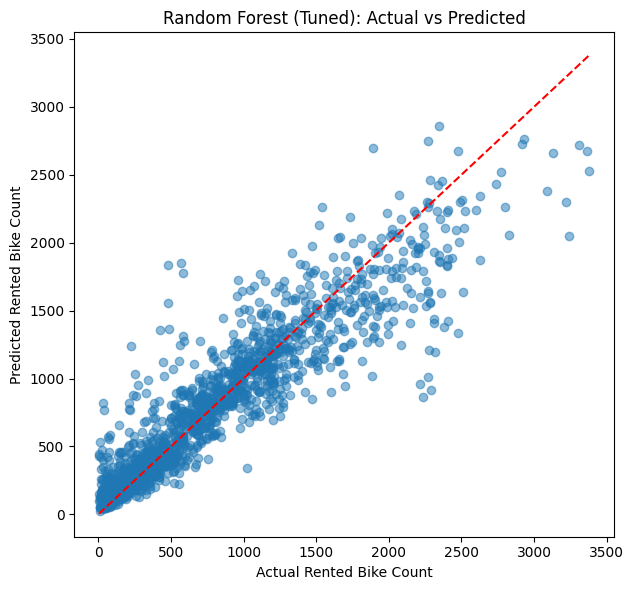

In [121]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model again using the best parameters
best_random_forest_model = RandomForestRegressor(**best_params)
best_random_forest_model.fit(X_train, y_train)

# Predict using the best model
random_forest_predictions = best_random_forest_model.predict(X_test)

# Calculate RMSE and R-squared
random_forest_rmse = mean_squared_error(y_test, random_forest_predictions, squared=False)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

print("Random Forest Performance (Tuned):")
print(f"  RMSE: {random_forest_rmse}")
print(f"  R-squared: {random_forest_r2}")

# Plot actual vs predicted for the tuned model
plt.figure(figsize=(12, 6))

# Random Forest plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, random_forest_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Line of perfect fit
plt.title("Random Forest (Tuned): Actual vs Predicted")
plt.xlabel("Actual Rented Bike Count")
plt.ylabel("Predicted Rented Bike Count")

plt.tight_layout()
plt.show()

In [122]:
random_forest_model = RandomForestRegressor(
    n_estimators=100,  
    max_depth= None,     
    min_samples_split=10,  
    min_samples_leaf=1, 
    max_features='sqrt',  
    bootstrap=False  
    
)

# train the model on the training data
random_forest_model.fit(X_train_cleaned, y_train_cleaned)

# make predictions on the test set
y_pred_cleaned_rf = random_forest_model.predict(X_test_cleaned)

# calculate RMSE, R-squared, and MAPE (error rate)
rmse_rf = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned_rf))
r2_rf = r2_score(y_test_cleaned, y_pred_cleaned_rf)

# calculate Mean Absolute Percentage Error (MAPE)
#mape_rf = np.mean(np.abs((y_test_cleaned - y_pred_cleaned_rf) / y_test_cleaned)) * 100

# print the evaluation metrics
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest - R-squared (R²): {r2_rf:.4f}")
#print(f"Random Forest - Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%")

# plot actual vs predicted values with a best fit line
plt.figure(figsize=(10, 6))
plt.scatter(y_test_cleaned, y_pred_cleaned_rf, alpha=0.5, label='Predicted vs Actual')

plt.plot([y_test_cleaned.min(), y_test_cleaned.max()], [y_test_cleaned.min(), y_test_cleaned.max()], 'r--', lw=2, label='Best Fit Line')

plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title(f'Random Forest: Actual vs Predicted (RMSE: {rmse_rf:.2f}, R²: {r2_rf:.4f}%)')

plt.legend()

plt.tight_layout()
plt.show()

Random Forest - Root Mean Squared Error (RMSE): 235.85
Random Forest - R-squared (R²): 0.8668


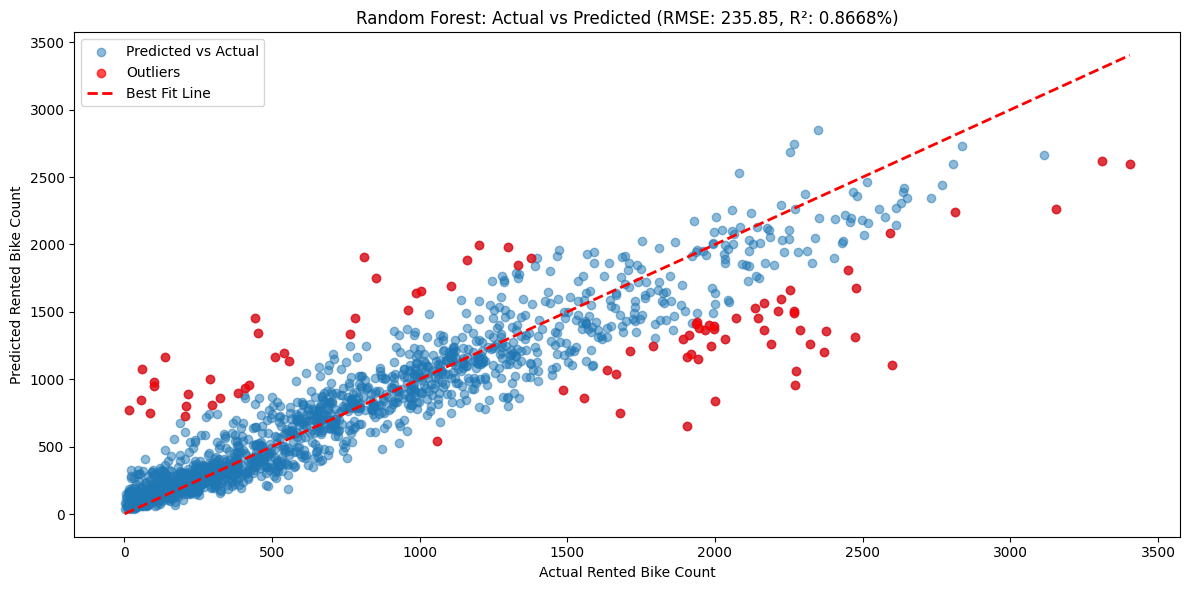

Outliers in the test set:
      Actual    Predicted    Residuals
7737     385   895.059238  -510.059238
5456    1944  1149.889790   794.110210
4624    2474  1313.555825  1160.444175
5038    1107  1689.717230  -582.717230
6358    1202  1994.550607  -792.550607
...      ...          ...          ...
4075    2450  1809.251306   640.748694
2336      88   752.353429  -664.353429
6357    1300  1980.848702  -680.848702
7801    1907  1167.526508   739.473492
2960    1677   750.724040   926.275960

[84 rows x 3 columns]


In [123]:
y_pred_rf = random_forest_model.predict(X_test_cleaned)

residuals_rf = y_test_cleaned - y_pred_rf

residual_threshold = np.abs(residuals_rf).quantile(0.95)  # Top 5% residuals as outliers
outliers_rf = (np.abs(residuals_rf) > residual_threshold)

plt.figure(figsize=(12, 6))

plt.scatter(y_test_cleaned, y_pred_rf, alpha=0.5, label='Predicted vs Actual')

plt.scatter(y_test_cleaned[outliers_rf], y_pred_rf[outliers_rf], color='red', label='Outliers', alpha=0.7)

plt.plot([min(y_test_cleaned), max(y_test_cleaned)], [min(y_test_cleaned), max(y_test_cleaned)], 'r--', lw=2, label='Best Fit Line')

plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title(f'Random Forest: Actual vs Predicted (RMSE: {rmse_rf:.2f}, R²: {r2_rf:.4f}%)')

plt.legend()

plt.tight_layout()
plt.show()

outliers_data = pd.DataFrame({
    'Actual': y_test_cleaned[outliers_rf],
    'Predicted': y_pred_rf[outliers_rf],
    'Residuals': residuals_rf[outliers_rf]
})

print("Outliers in the test set:")
print(outliers_data)

In [124]:
#outlier_indices = y_test_cleaned.index[outliers_rf]

#outlier_rows = datacopy_cleaned.loc[outlier_indices]
#pd.set_option('display.max_rows', None)

#print("Outliers data rows from datacopy_cleaned:")
#print(outlier_rows)


In [125]:
# define the condition to remove outliers where Hour is 8 and Rented Bike Count < 1000 or Hour is 16 and Rented Bike Count < 1000
#condition_to_remove = ~(
   # ((outlier_rows['Hour'] == 8) & (outlier_rows['Rented_Bike_Count'] < 1000)) | 
   # ((outlier_rows['Hour'] == 16) & (outlier_rows['Rented_Bike_Count'] < 1000))
#)

# keep only the outliers that don't meet the condition 
#outlier_rows_filtered = outlier_rows[condition_to_remove]

# print the filtered outliers
#print("Filtered outliers data rows from datacopy_cleaned:")
#print(outlier_rows_filtered)

#datacopy_cleaned_filtered = datacopy_cleaned.drop(outlier_rows[~condition_to_remove].index)

#pd.reset_option('display.max_rows')


In [127]:
#datacopy_cleaned_filtered.shape

Random Forest Test RMSE: 238.38
Random Forest Test R²: 0.8639


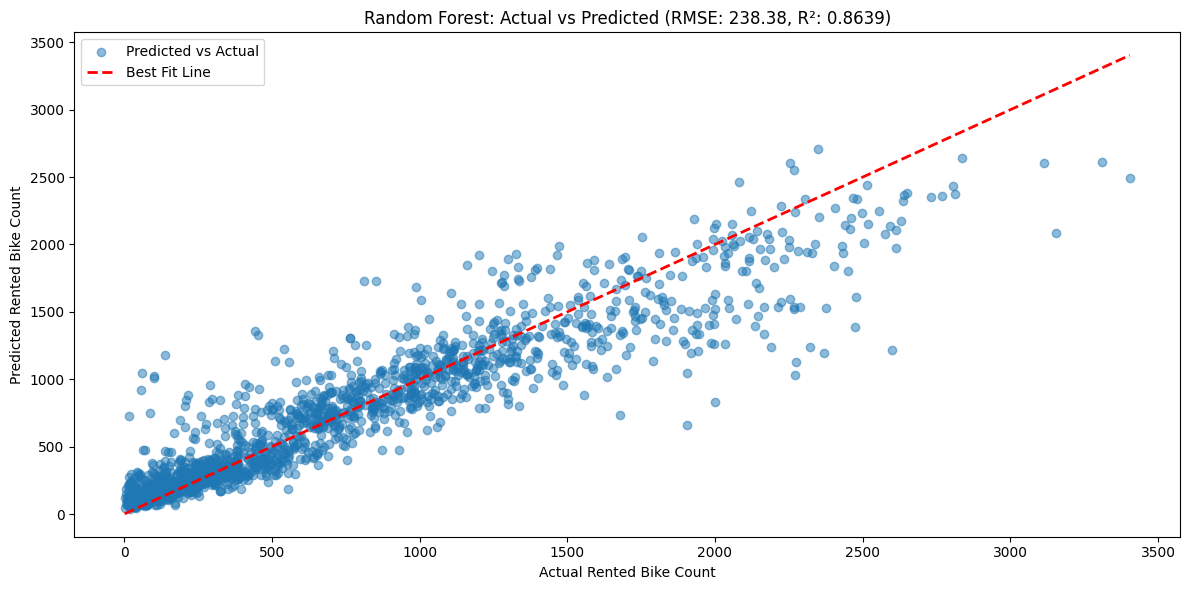

In [128]:
X_cleaned_filtered = datacopy_cleaned.drop(columns=['Rented_Bike_Count', 'Hour_Temp_Group', 'Temp_Range'])
y_cleaned_filtered = datacopy_cleaned['Rented_Bike_Count']

# stratified train-test 
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned_filtered, y_cleaned_filtered, test_size=0.2, stratify=datacopy_cleaned['Hour_Temp_Group'], random_state=42)

from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(
    n_estimators=500,  
    max_depth= None,     
    min_samples_split=20,  
    min_samples_leaf=1, 
    max_features='sqrt',  
    bootstrap=False  
    
)

random_forest_model.fit(X_train_cleaned, y_train_cleaned)

y_pred_rf = random_forest_model.predict(X_test_cleaned)

from sklearn.metrics import mean_squared_error, r2_score
rmse_rf = mean_squared_error(y_test_cleaned, y_pred_rf, squared=False)
r2_rf = r2_score(y_test_cleaned, y_pred_rf)
#mape_rf = np.mean(np.abs((y_test_cleaned - y_pred_rf) / y_test_cleaned)) * 100

#print(f"Random Forest Test MAPE: {mape_rf:.2f}")
# Print the results
print(f"Random Forest Test RMSE: {rmse_rf:.2f}")
print(f"Random Forest Test R²: {r2_rf:.4f}")

plt.figure(figsize=(12, 6))

plt.scatter(y_test_cleaned, y_pred_rf, alpha=0.5, label='Predicted vs Actual')

plt.plot([min(y_test_cleaned), max(y_test_cleaned)], [min(y_test_cleaned), max(y_test_cleaned)], 'r--', lw=2, label='Best Fit Line')

plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title(f'Random Forest: Actual vs Predicted (RMSE: {rmse_rf:.2f}, R²: {r2_rf:.4f})')

plt.legend()

plt.tight_layout()
plt.show()



In [132]:
importances = random_forest_model.feature_importances_

features = X_train_cleaned.columns

indices = np.argsort(importances)[::-1]

print("Feature importances:")
for f in range(X_train_cleaned.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]}")

plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
plt.bar(range(X_train_cleaned.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_cleaned.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

Feature importances:
Hour: 0.3613329357856713
Season: 0.1798462401144029
Solar_Radiation_(MJ/m2): 0.11027088529751655
Rainfall(mm): 0.0726457701300943
Temp_25_30): 0.04691903919954696
Wind_speed_(m/s): 0.03968552770425929
Temp_20_25): 0.037242963930363415
Temp_0_5): 0.035574456892478463
Temp_-5_0): 0.022741026865313832
Temp_5_10): 0.02132700571423819
Temp_-10_-5): 0.015504142644174941
Temp_15_20): 0.011597625752989804
WeekdaysOrWeekend: 0.010376557968581024
Snowfall_(cm): 0.00918342335990047
Temp_10_15): 0.008067723170379595
Temp_30_35): 0.007751148781716367
Holiday: 0.0038128418737701443
Temp_-15_-10): 0.003498436658623733
Temp_35_40): 0.0024124894845905425
Temp_-20_-15): 0.00020975867138807672
Temp_40_45): 0.0
Temp_-25_-20): 0.0
Temp_45_50): 0.0


In [129]:
y_train_pred_rf = random_forest_model.predict(X_train_cleaned)

# training set
rmse_train_rf = mean_squared_error(y_train_cleaned, y_train_pred_rf, squared=False)
r2_train_rf = r2_score(y_train_cleaned, y_train_pred_rf)

print(f"Random Forest Train RMSE: {rmse_train_rf:.2f}")
print(f"Random Forest Train R²: {r2_train_rf:.4f}")

# test set 
y_pred_rf = random_forest_model.predict(X_test_cleaned)

rmse_rf = mean_squared_error(y_test_cleaned, y_pred_rf, squared=False)
r2_rf = r2_score(y_test_cleaned, y_pred_rf)

print(f"Random Forest Test RMSE: {rmse_rf:.2f}")
print(f"Random Forest Test R²: {r2_rf:.4f}")

Random Forest Train RMSE: 188.67
Random Forest Train R²: 0.9145
Random Forest Test RMSE: 238.38
Random Forest Test R²: 0.8639


In [130]:
# training set
y_train_pred = xgb_model.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# test set 
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

print(f"Xgboost Train RMSE: {rmse_train:.2f}")
print(f"Xgboost Train R²: {r2_train:.4f}")

# Print the test set results
print(f"Xgboost Test RMSE: {rmse_test:.2f}")
print(f"Xgboost Test R²: {r2_test:.4f}")

Xgboost Train RMSE: 193.62
Xgboost Train R²: 0.9095
Xgboost Test RMSE: 233.01
Xgboost Test R²: 0.8728


In [131]:
plt.figure(figsize=(12, 6))

# Random Forest 
plt.scatter(y_test_cleaned, y_pred_rf, alpha=0.5, label='Random Forest Predictions', color='blue')

# XGBoost
plt.scatter(y_test_cleaned, y_pred_cleaned, alpha=0.5, label='XGBoost Predictions', color='yellow')

plt.plot([min(y_test_cleaned), max(y_test_cleaned)], [min(y_test_cleaned), max(y_test_cleaned)], 'r--', lw=2, label='Best Fit Line')

plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted: Random Forest vs XGBoost')

plt.legend()

plt.tight_layout()
plt.show()